In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In all of the next sections, we are going to predict bitcoin price using its past history and other stock market/economical data

In [3]:
RMSE_dict = {}

In [4]:
bitcoin = pd.read_excel("rania-DATA.xlsx", header = 1)

In [5]:
bitcoin['indice Dow Jones'] = bitcoin['indice Dow Jones'].str.strip(',')
bitcoin['indice Dow Jones'] = bitcoin['indice Dow Jones'].astype('float')
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Jour                             3697 non-null   int64  
 1   Prix BTC                         3694 non-null   float64
 2   Volume (BTC)                     2239 non-null   float64
 3   Nombre d'utilisateur             2220 non-null   float64
 4   Nombre d'adresse                 3693 non-null   float64
 5   Volume de sortie estimé          2239 non-null   float64
 6   Volume de transaction            3025 non-null   float64
 7   Taux de hachage                  3316 non-null   float64
 8   Bitcoin price volatility         3694 non-null   float64
 9   Prix de Brent par barrel         2567 non-null   float64
 10  prix pétrole                     1565 non-null   float64
 11  Prix Gold                        3312 non-null   float64
 12  Prix Silver         

In [6]:
from datetime import datetime

date_str = '06-12-2017'

date_object = datetime.strptime(date_str, '%m-%d-%Y').date()
from datetime import timedelta
date_object = date_object - timedelta(days = 2056)
mydatelist= [ date_object + timedelta(days = i) for i in range(3697)]

In [7]:
bitcoin.columns

Index(['Jour', 'Prix BTC ', 'Volume (BTC)', 'Nombre d'utilisateur',
       'Nombre d'adresse ', 'Volume de sortie estimé', 'Volume de transaction',
       'Taux de hachage', 'Bitcoin price volatility',
       'Prix de Brent par barrel', 'prix pétrole', 'Prix Gold ',
       'Prix Silver ', 'indice Dow Jones', 'indice nikkei 225',
       'taux de change EURUSD', 'PIB ($ US courants)', 'Taux d’intérêt réel ',
       'Croissance du RNB par habitant '],
      dtype='object')

In [8]:
bitcoin.drop('Jour',axis = 1)
bitcoin['Jour'] = mydatelist
bitcoin = bitcoin.set_index('Jour')
bitcoin

,Prix BTC,Volume (BTC),Nombre d'utilisateur,Nombre d'adresse,Volume de sortie estimé,Volume de transaction,Taux de hachage,Bitcoin price volatility,Prix de Brent par barrel,prix pétrole,Prix Gold,Prix Silver,indice Dow Jones,indice nikkei 225,taux de change EURUSD,PIB ($ US courants),Taux d’intérêt réel,Croissance du RNB par habitant
Jour,,,,,,,,,,,,,,,,,,
2011-10-26,3.85,134.73,229.0,8828.0,456569.0,5200.0,9.0,0.023472,104.55,93.88,1104.5,28.82,10520.09,8296.12,1.3039,1.559973e+13,0.011484,0.01412
2011-10-27,4.55,94.74,242.0,8828.0,456569.0,5200.0,9.0,0.041833,107.80,97.22,1103.0,29.50,10547.08,8336.48,1.3074,1.559973e+13,0.011484,0.01412
2011-10-28,4.38,20.90,265.0,9328.0,608602.0,5667.0,9.0,0.019857,108.00,98.67,1092.5,29.20,10545.41,8459.98,1.3054,1.559973e+13,0.011484,0.01412
2011-10-29,4.17,8.54,291.0,9328.0,608602.0,5667.0,9.0,0.021109,108.98,99.53,1104.0,29.00,10548.51,8395.16,1.3047,1.559973e+13,0.011484,0.01412
2011-10-30,4.22,149.49,318.0,9685.0,293820.0,5740.0,9.0,0.013909,109.28,99.68,1113.0,29.05,10428.05,8395.16,1.3057,1.559973e+13,0.011484,0.01412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-04,37138.23,NaN,NaN,904115.0,NaN,NaN,173500000.0,188.045818,90.70,NaN,NaN,NaN,35443.82,27011.33,1.1304,NaN,NaN,NaN
2021-12-05,37784.33,NaN,NaN,946247.0,NaN,NaN,203960000.0,110.561633,91.47,NaN,NaN,NaN,35369.09,26170.30,1.1268,NaN,NaN,NaN
2021-12-06,38138.18,NaN,NaN,821823.0,NaN,NaN,197340000.0,131.409031,NaN,NaN,NaN,NaN,35100.00,26717.34,1.1277,NaN,NaN,NaN


In [9]:
dow = bitcoin[bitcoin.columns[13]]

In [10]:
dow = dow.astype(float)

In [11]:
bitcoin[bitcoin.columns[13]] = dow

In [12]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3697 entries, 2011-10-26 to 2021-12-08
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prix BTC                         3694 non-null   float64
 1   Volume (BTC)                     2239 non-null   float64
 2   Nombre d'utilisateur             2220 non-null   float64
 3   Nombre d'adresse                 3693 non-null   float64
 4   Volume de sortie estimé          2239 non-null   float64
 5   Volume de transaction            3025 non-null   float64
 6   Taux de hachage                  3316 non-null   float64
 7   Bitcoin price volatility         3694 non-null   float64
 8   Prix de Brent par barrel         2567 non-null   float64
 9   prix pétrole                     1565 non-null   float64
 10  Prix Gold                        3312 non-null   float64
 11  Prix Silver                      2543 non-null   float64
 12  indice Dow

In [13]:
fill_btc =bitcoin.interpolate(option='spline')



In [14]:
fill_btc.describe()

,Prix BTC,Volume (BTC),Nombre d'utilisateur,Nombre d'adresse,Volume de sortie estimé,Volume de transaction,Taux de hachage,Bitcoin price volatility,Prix de Brent par barrel,prix pétrole,Prix Gold,Prix Silver,indice Dow Jones,indice nikkei 225,taux de change EURUSD,PIB ($ US courants),Taux d’intérêt réel,Croissance du RNB par habitant
count,3697.000000,3697.000000,3.697000e+03,3.697000e+03,3.697000e+03,3697.000000,3.697000e+03,3697.000000,3697.000000,3697.000000,3697.000000,3697.000000,3697.000000,3697.000000,3697.000000,3.697000e+03,3697.000000,3697.000000
mean,8151.460007,34299.989097,1.202389e+07,4.731291e+05,1.915911e+06,143707.624290,2.879593e+07,31.580095,71.972096,68.522682,1486.292368,20.205308,22254.892743,19102.013311,1.191262,1.929465e+13,0.020024,0.024071
std,14458.199644,30862.017971,9.818690e+06,3.410723e+05,2.024591e+06,116440.115471,4.250183e+07,169.450848,26.143367,19.729000,259.711281,5.375505,8274.829113,5491.778371,0.091933,2.072489e+12,0.007158,0.014814
min,3.850000,0.250000,5.798000e+00,8.668000e+03,2.610050e+05,5023.000000,8.000000e+00,0.006557,9.120000,26.140000,1049.600000,11.730000,9686.480000,8295.630000,1.036400,1.559973e+13,0.008692,0.004203
25%,270.630000,5844.420000,1.791263e+06,1.516890e+05,1.167867e+06,31268.000000,1.238070e+05,0.443618,51.290000,53.543333,1256.500000,16.250000,15335.280000,15359.104286,1.118500,1.755068e+13,0.013548,0.014781
50%,921.980000,17067.730000,1.112022e+07,4.638490e+05,1.914333e+06,97296.000000,2.589950e+06,3.435442,65.260000,64.070000,1404.900000,17.870000,20905.860000,19545.770000,1.170700,1.947962e+13,0.021579,0.022213
75%,8757.790000,70961.370000,2.279039e+07,7.373980e+05,1.914333e+06,243157.000000,4.898699e+07,20.575581,100.430000,88.060000,1767.250000,23.760000,30015.510000,22472.910000,1.266600,2.089374e+13,0.024565,0.024502
max,67566.830000,137070.180000,2.279039e+07,1.362772e+06,4.599222e+07,490644.000000,2.168600e+08,5286.111998,128.140000,110.540000,2058.400000,37.140000,36799.650000,30670.100000,1.395300,2.299610e+13,0.034324,0.057000


In [15]:
bitcoin.describe()

,Prix BTC,Volume (BTC),Nombre d'utilisateur,Nombre d'adresse,Volume de sortie estimé,Volume de transaction,Taux de hachage,Bitcoin price volatility,Prix de Brent par barrel,prix pétrole,Prix Gold,Prix Silver,indice Dow Jones,indice nikkei 225,taux de change EURUSD,PIB ($ US courants),Taux d’intérêt réel,Croissance du RNB par habitant
count,3694.000000,2239.000000,2.220000e+03,3.693000e+03,2.239000e+03,3025.000000,3.316000e+03,3694.000000,2567.000000,1565.000000,3312.000000,2543.000000,3697.000000,2410.000000,3694.000000,3.672000e+03,3672.000000,3672.000000
mean,8157.848265,10508.755051,4.947766e+06,4.732755e+05,1.917958e+06,169980.805950,1.872244e+07,31.605183,71.836587,71.936102,1449.668961,20.185254,22254.892743,19089.762058,1.191262,1.926945e+13,0.020102,0.023846
std,14462.331927,11492.067929,5.850981e+06,3.411274e+05,2.601645e+06,112998.821337,3.022817e+07,169.517372,26.036026,24.944479,249.818660,5.386617,8274.829113,5520.340120,0.091970,2.056823e+12,0.007121,0.014612
min,3.850000,0.250000,5.798000e+00,8.668000e+03,2.610050e+05,5023.000000,8.000000e+00,0.006557,9.120000,26.140000,1049.600000,11.730000,9686.480000,8295.630000,1.036400,1.559973e+13,0.008692,0.004203
25%,270.210000,3434.125000,4.828155e+02,1.512360e+05,8.128845e+05,60395.000000,3.932500e+04,0.443269,51.065000,48.420000,1246.475000,16.230000,15335.280000,15516.735000,1.118500,1.755068e+13,0.013548,0.014781
50%,926.410000,7474.810000,2.728110e+06,4.653420e+05,1.414610e+06,178374.000000,1.492764e+06,3.442815,65.100000,64.460000,1342.675000,17.830000,20905.860000,19647.710000,1.170500,1.869511e+13,0.021579,0.020854
75%,8777.815000,13783.440000,7.896722e+06,7.373980e+05,2.255417e+06,266832.000000,4.163520e+07,20.579724,100.070000,96.440000,1692.312500,23.755000,30015.510000,22497.817500,1.266825,2.089374e+13,0.024565,0.024502
max,67566.830000,137070.180000,2.279039e+07,1.362772e+06,4.599222e+07,490644.000000,2.168600e+08,5286.111998,128.140000,110.540000,2058.400000,37.140000,36799.650000,30670.100000,1.395300,2.299610e+13,0.034324,0.057000


In [16]:
bitcoin.columns

Index(['Prix BTC ', 'Volume (BTC)', 'Nombre d'utilisateur',
       'Nombre d'adresse ', 'Volume de sortie estimé', 'Volume de transaction',
       'Taux de hachage', 'Bitcoin price volatility',
       'Prix de Brent par barrel', 'prix pétrole', 'Prix Gold ',
       'Prix Silver ', 'indice Dow Jones', 'indice nikkei 225',
       'taux de change EURUSD', 'PIB ($ US courants)', 'Taux d’intérêt réel ',
       'Croissance du RNB par habitant '],
      dtype='object')

In [17]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [18]:
data = pd.DataFrame(fill_btc["Prix BTC "])


In [19]:
data.columns = ['prix']

# Multi-variate Time Series Forecasting using CNN WITHOUT FEATURE SELECTION

In [20]:
# import packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import math
from torchsummaryX import summary

# To auto load the customise module
%load_ext autoreload
%autoreload 2
import deep_learning_module
import data_module

In [21]:
fill_btc

,Prix BTC,Volume (BTC),Nombre d'utilisateur,Nombre d'adresse,Volume de sortie estimé,Volume de transaction,Taux de hachage,Bitcoin price volatility,Prix de Brent par barrel,prix pétrole,Prix Gold,Prix Silver,indice Dow Jones,indice nikkei 225,taux de change EURUSD,PIB ($ US courants),Taux d’intérêt réel,Croissance du RNB par habitant
Jour,,,,,,,,,,,,,,,,,,
2011-10-26,3.85,134.73,229.0,8828.0,456569.0,5200.0,9.0,0.023472,104.550000,93.88,1104.5000,28.82,10520.09,8296.12,1.3039,1.559973e+13,0.011484,0.01412
2011-10-27,4.55,94.74,242.0,8828.0,456569.0,5200.0,9.0,0.041833,107.800000,97.22,1103.0000,29.50,10547.08,8336.48,1.3074,1.559973e+13,0.011484,0.01412
2011-10-28,4.38,20.90,265.0,9328.0,608602.0,5667.0,9.0,0.019857,108.000000,98.67,1092.5000,29.20,10545.41,8459.98,1.3054,1.559973e+13,0.011484,0.01412
2011-10-29,4.17,8.54,291.0,9328.0,608602.0,5667.0,9.0,0.021109,108.980000,99.53,1104.0000,29.00,10548.51,8395.16,1.3047,1.559973e+13,0.011484,0.01412
2011-10-30,4.22,149.49,318.0,9685.0,293820.0,5740.0,9.0,0.013909,109.280000,99.68,1113.0000,29.05,10428.05,8395.16,1.3057,1.559973e+13,0.011484,0.01412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-04,37138.23,70961.37,22790393.0,904115.0,1914333.0,25166.0,173500000.0,188.045818,90.700000,64.07,1801.3488,22.40,35443.82,27011.33,1.1304,2.299610e+13,0.008692,0.05700
2021-12-05,37784.33,70961.37,22790393.0,946247.0,1914333.0,25166.0,203960000.0,110.561633,91.470000,64.07,1801.3488,22.40,35369.09,26170.30,1.1268,2.299610e+13,0.008692,0.05700
2021-12-06,38138.18,70961.37,22790393.0,821823.0,1914333.0,25166.0,197340000.0,131.409031,91.763333,64.07,1801.3488,22.40,35100.00,26717.34,1.1277,2.299610e+13,0.008692,0.05700


We use MinMaxScaler to scale down the values. The neural network converges sooner when it exposes the same scaled features and gives better accuracy.

In [22]:
btcdata = fill_btc

In [23]:
btcdata.isnull().any()

Prix BTC                           False
Volume (BTC)                       False
Nombre d'utilisateur               False
Nombre d'adresse                   False
Volume de sortie estimé            False
Volume de transaction              False
Taux de hachage                    False
Bitcoin price volatility           False
Prix de Brent par barrel           False
prix pétrole                       False
Prix Gold                          False
Prix Silver                        False
indice Dow Jones                   False
indice nikkei 225                  False
taux de change EURUSD              False
PIB ($ US courants)                False
Taux d’intérêt réel                False
Croissance du RNB par habitant     False
dtype: bool

In [24]:
btcdata.columns

Index(['Prix BTC ', 'Volume (BTC)', 'Nombre d'utilisateur',
       'Nombre d'adresse ', 'Volume de sortie estimé', 'Volume de transaction',
       'Taux de hachage', 'Bitcoin price volatility',
       'Prix de Brent par barrel', 'prix pétrole', 'Prix Gold ',
       'Prix Silver ', 'indice Dow Jones', 'indice nikkei 225',
       'taux de change EURUSD', 'PIB ($ US courants)', 'Taux d’intérêt réel ',
       'Croissance du RNB par habitant '],
      dtype='object')

In [25]:
# Here we are chosing compared to the interpolation quality of the Time Series and the number of missing values
val = ['Prix Gold ','Prix Silver ','indice Dow Jones','Prix de Brent par barrel', 'taux de change EURUSD', 'Taux d’intérêt réel ' ,'Croissance du RNB par habitant ','Prix BTC ']

In [26]:
prix = btcdata['Prix BTC ']
btcdata = btcdata[val]
btcdata['prix'] = prix

In [27]:
btcdata.columns

Index(['Prix Gold ', 'Prix Silver ', 'indice Dow Jones',
       'Prix de Brent par barrel', 'taux de change EURUSD',
       'Taux d’intérêt réel ', 'Croissance du RNB par habitant ', 'Prix BTC ',
       'prix'],
      dtype='object')

In [28]:
# We do this so the value to predict in the last row of the dataframe
btcdata.columns

Index(['Prix Gold ', 'Prix Silver ', 'indice Dow Jones',
       'Prix de Brent par barrel', 'taux de change EURUSD',
       'Taux d’intérêt réel ', 'Croissance du RNB par habitant ', 'Prix BTC ',
       'prix'],
      dtype='object')

In [29]:
# here we will create a model to try to predict the last 30 days of BTC price
train_data = btcdata[:-30 ]
test_data = btcdata[-30 :]
train_time = btcdata.index[:-30 ]
test_time= btcdata.index[-30 :]

print("train_data_shape")
print(btcdata.shape)
print("test_data_shape")
print(btcdata.shape)

train_data_shape
(3697, 9)
test_data_shape
(3697, 9)


## Data Normalization 
Normalize the data into range of 0 to 1

In [30]:
scaler,train_data_normalized,test_data_normalized = data_module.multi_data_scaler(train_data,
                                                                                         test_data,
                                                                                         scale_mode = "Normalize")
print("train_data_normalized_demand"+str(train_data_normalized.shape))
print("test_data_normalized_demand"+str(test_data_normalized.shape))

train_data_normalized_demand(3667, 9)
test_data_normalized_demand(30, 9)


## Data Sequencing
Sequencing the data by taking in the multivariate series into x-feature and y-label

In [31]:
#Hyperameter
split_ratio = 0.70
num_epochs = 20
window_size = 5
n_step = 2
learning_rate = 0.001
batch_size = 5
#seed
torch.manual_seed(123)

In [32]:
trainX ,trainY=  data_module.multivariate_univariate_multi_step(train_data_normalized,window_size,n_step)
testX , testY = data_module.multivariate_univariate_multi_step(test_data_normalized,window_size,n_step)
print(f"trainX_demand shape:{trainX.shape} trainY_demand shape:{trainY.shape}\n")
print(f"testX_demand shape:{testX.shape} testY_demand shape:{testY.shape}")

trainX_demand shape:(3662, 5, 8) trainY_demand shape:(3662, 2)

testX_demand shape:(25, 5, 8) testY_demand shape:(25, 2)


In [33]:
trainY = trainY.reshape(trainY.shape[0],n_step,1)
testY= testY.reshape(testY.shape[0],n_step,1)
print(f"trainY shape:{trainY.shape}")
print(f"testY shape:{testY.shape}")

trainY shape:(3662, 2, 1)
testY shape:(25, 2, 1)


### Data Transform
Data needs to be transformed from numpy to pytorch tensor before being fed into the model.

>**Instruction** : <br>
Use `data_module.key_assign` to assign the key and `data_module.transform` to transform the data.

In [34]:
### BEGIN SOLUTION
train_data_dict ,test_data_dict = data_module.key_assign(trainingX = trainX  , 
                       testingX = testX, 
                       trainingY = trainY, 
                       testingY = testY)
train_data_dict ,test_data_dict = data_module.transform(train_data_dict ,test_data_dict)
### END SOLUTION

In [35]:
data_module.sanity_check(train_data_dict , test_data_dict)

train_data_x_feature shape : torch.Size([3662, 5, 8])
train_data_y_label shape : torch.Size([3662, 2, 1])
test_data_x_feature shape : torch.Size([25, 5, 8])
test_data_y_label shape : torch.Size([25, 2, 1])


## Data Transpose 
You are require to transpose the x-feature data in such a way that : <br>
>`(batch_size, number_of_features, sequence_length)`.


>**Instruction** : <br>
Use `transpose` function in `data_module.py` to transpose the suitable input data for CNN model.

In [36]:
train_data_dict , test_data_dict = data_module.transpose(train_data_dict,
                                                                     test_data_dict)

In [37]:
data_module.sanity_check(train_data_dict , test_data_dict)

train_data_x_feature shape : torch.Size([3662, 8, 5])
train_data_y_label shape : torch.Size([3662, 2, 1])
test_data_x_feature shape : torch.Size([25, 8, 5])
test_data_y_label shape : torch.Size([25, 2, 1])


## Data Iterator
Iterator is created to separate the data into several batches to fasten the training process
>**Instruction** : <br>
Use `data_module.iterator` to create data iterator.

In [38]:
### BEGIN SOLUTION
train_iter , test_iter = data_module.iterator(train_data_dict ,
                                                          test_data_dict,
                                                          batch_size = batch_size)
### END SOLUTION

## Input Model

>**Instruction** : <br>
Input the model that you have configured

In [39]:
class CNN(nn.Module):

    def __init__(self,n_feature,n_step):
        super(CNN, self).__init__()
        
        self.n_feature = n_feature
        self.n_step = n_step

        # Conv1d in_channels is base on num time series
        # Input:(N,C,Lin) Output : (N,C,Lout)
        self.conv1 = nn.Conv1d(in_channels = n_feature, out_channels = 30, kernel_size = 2)
        
        # For example Input:(N,C,Lin) Output : (N,C,Lout)
        self.poo1 = nn.MaxPool1d(kernel_size=2)
        
        self.conv2 = nn.Conv1d(in_channels = 30, out_channels = 20, kernel_size = 2)
        
        # AdaptiveMaxPool1d use to make sure it always will output  = 1 ,to make sure return the correct batch size 
        self.pool2 = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(20, 10)
        self.fc2 = nn.Linear(10,n_step)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.poo1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1,20)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [40]:
['Prix BTC ']# seed
torch.manual_seed(123)

n_feature = train_data_dict['train_data_x_feature'].shape[1]
### BEGIN SOLUTION
# Input the attribute need by the model 
model = CNN(n_feature = n_feature,
                  n_step = n_step )

### END SOLUTION

# Define the optimizer (Here we use Adam as our optimizer)
### BEGIN SOLUTION
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
### END SOLUTION

# Define the loss function (Here we use MSE as the loss function)
### BEGIN SOLUTION
loss_fn = nn.MSELoss()
### END SOLUTION

In [41]:
seq_length = train_data_dict['train_data_x_feature'].shape[2]

# batch size ,input_dim ,seq_length
inputs = torch.zeros((batch_size,
                      n_feature ,
                      seq_length),dtype=torch.float) 

print(summary(model,inputs))

        Kernel Shape Output Shape Params Mult-Adds
Layer                                             
0_conv1   [8, 30, 2]   [5, 30, 4]  510.0     1.92k
1_poo1             -   [5, 30, 2]      -         -
2_conv2  [30, 20, 2]   [5, 20, 1]  1.22k      1.2k
3_pool2            -   [5, 20, 1]      -         -
4_fc1       [20, 10]      [5, 10]  210.0     200.0
5_fc2        [10, 2]       [5, 2]   22.0      20.0
----------------------------------------------------
                      Totals
Total params          1.962k
Trainable params      1.962k
Non-trainable params     0.0
Mult-Adds              3.34k
        Kernel Shape Output Shape  Params  Mult-Adds
Layer                                               
0_conv1   [8, 30, 2]   [5, 30, 4]   510.0     1920.0
1_poo1             -   [5, 30, 2]     NaN        NaN
2_conv2  [30, 20, 2]   [5, 20, 1]  1220.0     1200.0
3_pool2            -   [5, 20, 1]     NaN        NaN
4_fc1       [20, 10]      [5, 10]   210.0      200.0
5_fc2        [10, 2]   

In [42]:
torch.manual_seed(123)

# Xavier weight intialization
def weights_init(m):
    if isinstance(m, nn.Conv1d):
        nn.init.xavier_uniform_(m.weight.data)
        
model.apply(weights_init)

CNN(
  (conv1): Conv1d(8, 30, kernel_size=(2,), stride=(1,))
  (poo1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(30, 20, kernel_size=(2,), stride=(1,))
  (pool2): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)

# Step 3 : Training
>**Instruction** : <br>
Use `deep_learning_module.training` to train the model.

In [43]:
#seed
torch.manual_seed(123)
### BEGIN SOLUTION

# Start training 
train_loss,val_loss= deep_learning_module.training(num_epochs= num_epochs ,
                                                    train_iter = train_iter,
                                                    test_iter = test_iter ,
                                                    optimizer = optimizer,
                                                    loss_fn = loss_fn,
                                                    model = model)
### END SOLUTION

# Step 4 : Validation

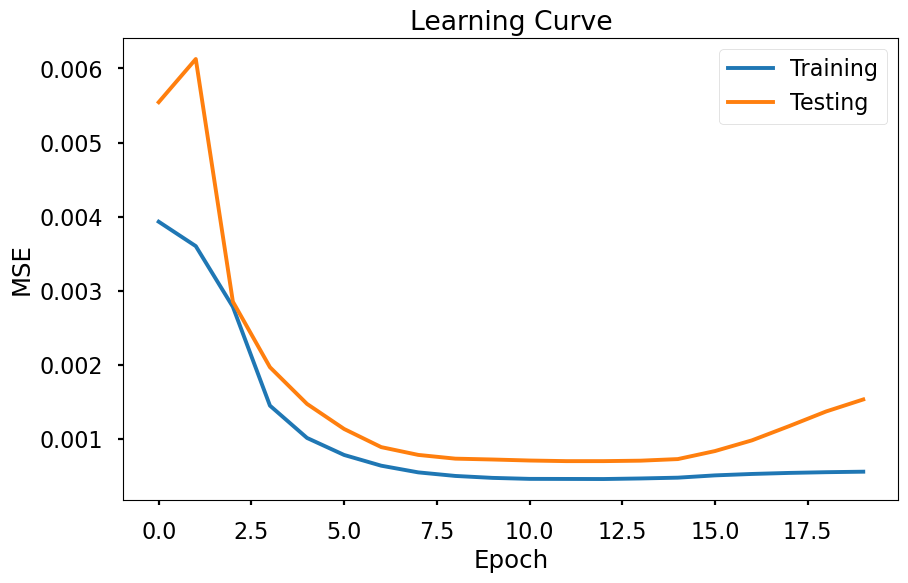

Epoch : 0 , training loss : 0.003929846713810416 , validation loss : 0.00554444482550025
Epoch : 1 , training loss : 0.003600022921159754 , validation loss : 0.006127813085913658
Epoch : 2 , training loss : 0.0027801774775543914 , validation loss : 0.0028504258720204235
Epoch : 3 , training loss : 0.0014449865110740087 , validation loss : 0.001964098506141454
Epoch : 4 , training loss : 0.0010084815660846836 , validation loss : 0.001468140637734905
Epoch : 5 , training loss : 0.0007785636493198292 , validation loss : 0.0011299095494905487
Epoch : 6 , training loss : 0.0006336109872146665 , validation loss : 0.0008846072014421225
Epoch : 7 , training loss : 0.0005432742513113159 , validation loss : 0.0007793224678607658
Epoch : 8 , training loss : 0.0004950420657415307 , validation loss : 0.0007286722844582983
Epoch : 9 , training loss : 0.00046890586251989235 , validation loss : 0.0007172712997999042
Epoch : 10 , training loss : 0.0004554778163377207 , validation loss : 0.0007034929207

In [44]:
# Plot Learning Curve 
### BEGIN SOLUTION
data_module.learning_curve(num_epochs = num_epochs,
                           train_loss = train_loss ,
                           val_loss = val_loss)

### END SOLUTION

# Step 5 : Evaluation
This section is to inference the model by feeding in testing data, determining the output forecast values and calculating the RMSE. For this exercise, use the function in `data_module` to run in each section.

It consists of 4 sections :

Section 1 : Feed in the train and test data to the model <br>
Section 2 : Reshape both to the original data dimension <br> 
Section 3 : Invert the scaling back to the original data value <br>
Section 4 : Calculate the RMSE of train and test data

>**Instruction** : <br>
Complete each section with the function in `data_module.py`

In [45]:
# Section 1 : Make predictions

### BEGIN SOLUTION
with torch.no_grad():
    y_train_prediction = model(train_data_dict['train_data_x_feature'])
    y_test_prediction = model(test_data_dict['test_data_x_feature'])
### END SOLUTION

In [46]:
# Assign evaluation key
### BEGIN SOLUTION
prediction , output = data_module.key_assign_evaluation(y_train_prediction,
                                                                    y_test_prediction,
                                                                    train_data_dict,
                                                                    test_data_dict)
### END SOLUTION


# Section 2 : Reshape data
### BEGIN SOLUTION
# Squeeze the output dimension
output_data = data_module.squeeze_dimension(output)
### END SOLUTION

In [47]:
data_module.sanity_check(data_1 = output_data,data_2 = {})

train_data_output shape : torch.Size([3662, 2])
test_data_output shape : torch.Size([25, 2])


In [48]:
# Section 3 : Invert the scaling back to orignal data value
### BEGIN SOLUTION
scaler_output = scaler[list(scaler)[-1]]
prediction = data_module.inverse_scaler(prediction,scaler_output)
output_data  = data_module.inverse_scaler(output_data ,scaler_output)
### END SOLUTION

`np.rint` is used to round our data to integer since the death cases should be an integer.

In [49]:
prediction['test_data_prediction'] = np.rint(prediction['test_data_prediction'])
output_data['test_data_output'] =  np.rint(output_data['test_data_output']) 

In [50]:
# List the forecast value
### BEGIN SOLUTION
data_module.list_forecast_value(output_data,prediction) 
### END SOLUTION

Test Data			Forecast
[43161. 41558.]		[43803. 43864.]
[41558. 41734.]		[43167. 43238.]
[41734. 41912.]		[42613. 42694.]
[41912. 41821.]		[42446. 42529.]
[41821. 42736.]		[42413. 42497.]
[42736. 43949.]		[42765. 42843.]
[43949. 42592.]		[43321. 43389.]
[42592. 43100.]		[43453. 43520.]
[43100. 43177.]		[43460. 43527.]
[43177. 43114.]		[43420. 43487.]
[43114. 42251.]		[43412. 43479.]
[42251. 42376.]		[43270. 43339.]
[42376. 41744.]		[42902. 42978.]
[41744. 40680.]		[42692. 42772.]
[40680. 36457.]		[42506. 42589.]
[36457. 35030.]		[42171. 42260.]
[35030. 36277.]		[40912. 41022.]
[36277. 36654.]		[39796. 39925.]
[36654. 36954.]		[40001. 40127.]
[36954. 36852.]		[40030. 40155.]
[36852. 37138.]		[40110. 40234.]
[37138. 37784.]		[40157. 40280.]
[37784. 38138.]		[40390. 40509.]
[38138. 37918.]		[40565. 40681.]
[37918. 38483.]		[40611. 40726.]


In [51]:
# calculate root mean squared error
### BEGIN SOLUTION
trainScore,testScore = data_module.rmse(prediction,output_data)
RMSE_dict['No Selection '] = testScore
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))
### END SOLUTION

Train Score: 7063.57 RMSE
Test Score: 2641.51 RMSE


In [52]:
# Here we have used the following values :
val 

['Prix Gold ',
 'Prix Silver ',
 'indice Dow Jones',
 'Prix de Brent par barrel',
 'taux de change EURUSD',
 'Taux d’intérêt réel ',
 'Croissance du RNB par habitant ',
 'Prix BTC ']

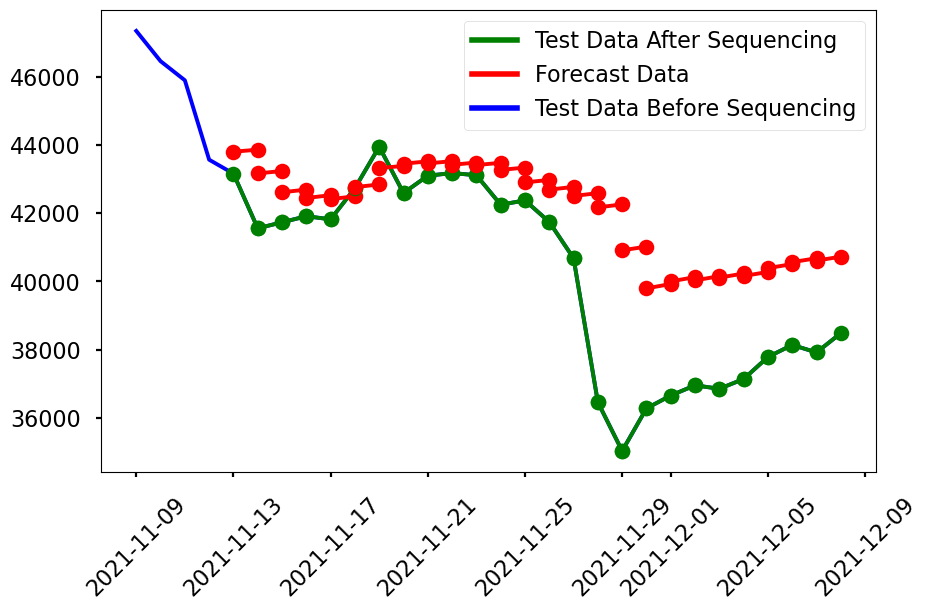

In [53]:
data_module.multi_step_plot(original_test_data = test_data["prix"],
                            after_sequence_test_data = output_data,
                            forecast_data = prediction,
                            test_time = test_time,
                            window_size = window_size,
                            n_step = n_step,
                            details={},
                            original_plot=True,
                            multivariate = True)


# Multi-variate Time Series Forecasting using CNN USING FEATURE SELECTION

In [54]:
['Prix Gold ', 'Prix Silver ', 'indice Dow Jones',
       'Prix de Brent par barrel', 'taux de change EURUSD',
       'Taux d’intérêt réel ', 'Croissance du RNB par habitant ', 'Prix BTC ',
       'prix']

['Prix Gold ',
 'Prix Silver ',
 'indice Dow Jones',
 'Prix de Brent par barrel',
 'taux de change EURUSD',
 'Taux d’intérêt réel ',
 'Croissance du RNB par habitant ',
 'Prix BTC ',
 'prix']

# Here we are conserving feature with only precise interpolation

In [55]:
val = ['Prix Gold ',
 'Prix Silver ',
 'indice Dow Jones',
 'Prix de Brent par barrel',
 'taux de change EURUSD',
 'Taux d’intérêt réel ',
 'Croissance du RNB par habitant ']

In [56]:
class CNN(nn.Module):

    def __init__(self,n_feature,n_step):
        super(CNN, self).__init__()
        
        self.n_feature = n_feature
        self.n_step = n_step

        # Conv1d in_channels is base on num time series
        # Input:(N,C,Lin) Output : (N,C,Lout)
        self.conv1 = nn.Conv1d(in_channels = n_feature, out_channels = 30, kernel_size = 2)
        
        # For example Input:(N,C,Lin) Output : (N,C,Lout)
        self.poo1 = nn.MaxPool1d(kernel_size=2)
        
        self.conv2 = nn.Conv1d(in_channels = 30, out_channels = 20, kernel_size = 2)
        
        # AdaptiveMaxPool1d use to make sure it always will output  = 1 ,to make sure return the correct batch size 
        self.pool2 = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(20, 10)
        self.fc2 = nn.Linear(10,n_step)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.poo1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1,20)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x


Prediction using Prix Gold 


train_data_shape
(3697, 3)
test_data_shape
(3697, 3)
train_data_normalized_demand(3667, 3)
test_data_normalized_demand(30, 3)
trainX_demand shape:(3662, 5, 2) trainY_demand shape:(3662, 2)

testX_demand shape:(25, 5, 2) testY_demand shape:(25, 2)
trainY shape:(3662, 2, 1)
testY shape:(25, 2, 1)
train_data_x_feature shape : torch.Size([3662, 5, 2])
train_data_y_label shape : torch.Size([3662, 2, 1])
test_data_x_feature shape : torch.Size([25, 5, 2])
test_data_y_label shape : torch.Size([25, 2, 1])
train_data_x_feature shape : torch.Size([3662, 2, 5])
train_data_y_label shape : torch.Size([3662, 2, 1])
test_data_x_feature shape : torch.Size([25, 2, 5])
test_data_y_label shape : torch.Size([25, 2, 1])
        Kernel Shape Output Shape Params Mult-Adds
Layer                                             
0_conv1   [2, 30, 2]   [5, 30, 4]  150.0     480.0
1_poo1             -   [5, 30, 2]      -         -
2_conv2  [30, 20, 2]   [5, 20, 1]  1.22k      1.2k
3_pool

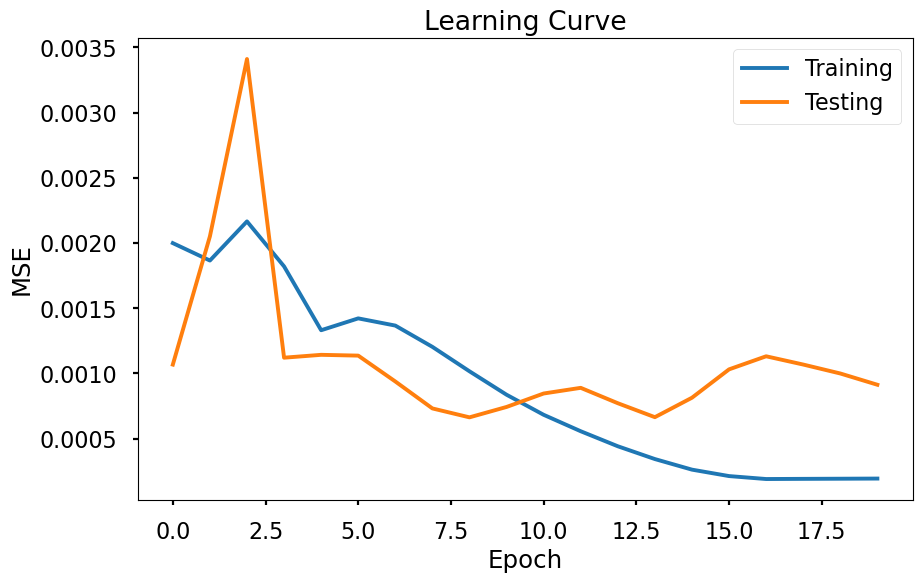

Epoch : 0 , training loss : 0.0019993036738567187 , validation loss : 0.0010680822379072197
Epoch : 1 , training loss : 0.0018656778474370722 , validation loss : 0.0020508989196969195
Epoch : 2 , training loss : 0.0021656871939209677 , validation loss : 0.0034103718819096683
Epoch : 3 , training loss : 0.0018208107113589303 , validation loss : 0.0011209691350813956
Epoch : 4 , training loss : 0.001331447804466873 , validation loss : 0.0011429231381043792
Epoch : 5 , training loss : 0.0014223312927696932 , validation loss : 0.0011368539504474028
Epoch : 6 , training loss : 0.0013671049702173458 , validation loss : 0.0009385959070641548
Epoch : 7 , training loss : 0.0012039709533261103 , validation loss : 0.0007320503660594113
Epoch : 8 , training loss : 0.0010166738744521338 , validation loss : 0.0006636875943513588
Epoch : 9 , training loss : 0.0008370604535248296 , validation loss : 0.0007433521182974801
Epoch : 10 , training loss : 0.00068326810345369 , validation loss : 0.0008464553

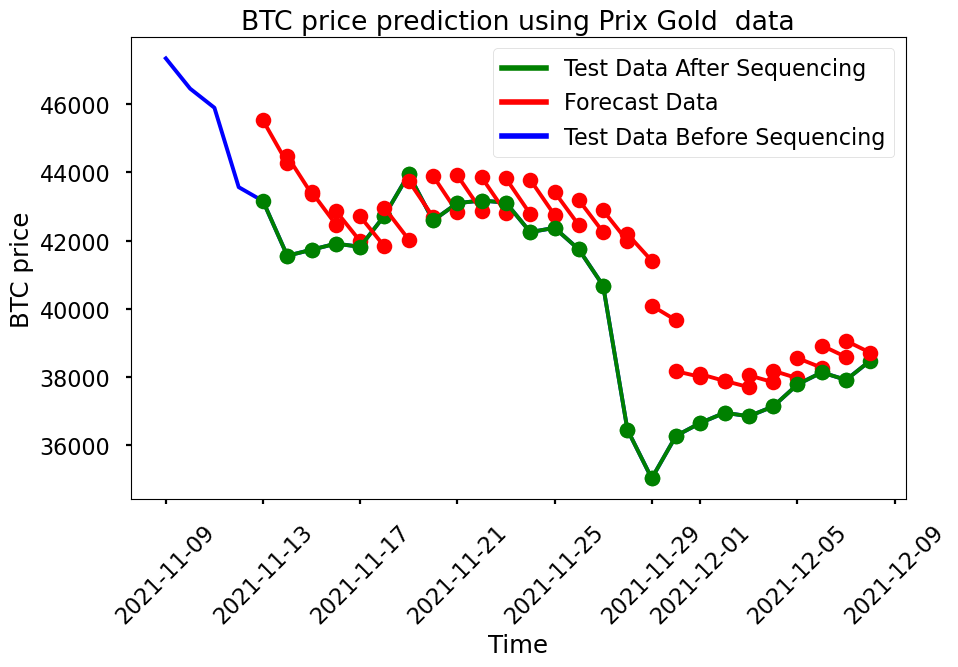

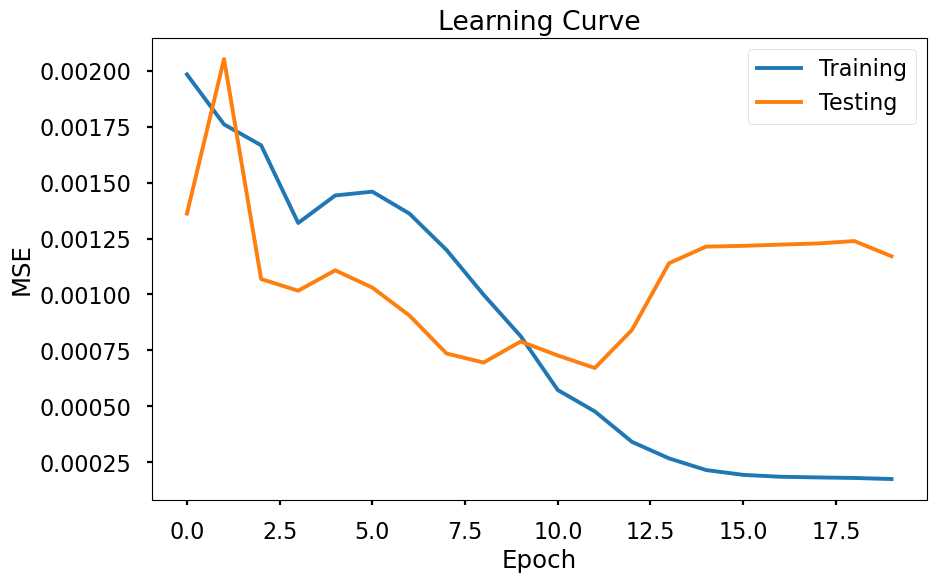

Epoch : 0 , training loss : 0.001983047605077278 , validation loss : 0.0013615765317808836
Epoch : 1 , training loss : 0.0017598623911811277 , validation loss : 0.002051841132924892
Epoch : 2 , training loss : 0.0016666287995618255 , validation loss : 0.0010689788439776748
Epoch : 3 , training loss : 0.001319454256772373 , validation loss : 0.001016797820921056
Epoch : 4 , training loss : 0.001442439522155928 , validation loss : 0.0011079485935624688
Epoch : 5 , training loss : 0.0014592974666939188 , validation loss : 0.0010307341784937308
Epoch : 6 , training loss : 0.0013612747368820723 , validation loss : 0.0009059262956725433
Epoch : 7 , training loss : 0.00119884310629029 , validation loss : 0.0007364264762145467
Epoch : 8 , training loss : 0.0009988391984803106 , validation loss : 0.000695911530056037
Epoch : 9 , training loss : 0.0008136094679769207 , validation loss : 0.0007899322547018528
Epoch : 10 , training loss : 0.0005731955774442993 , validation loss : 0.000727538991486

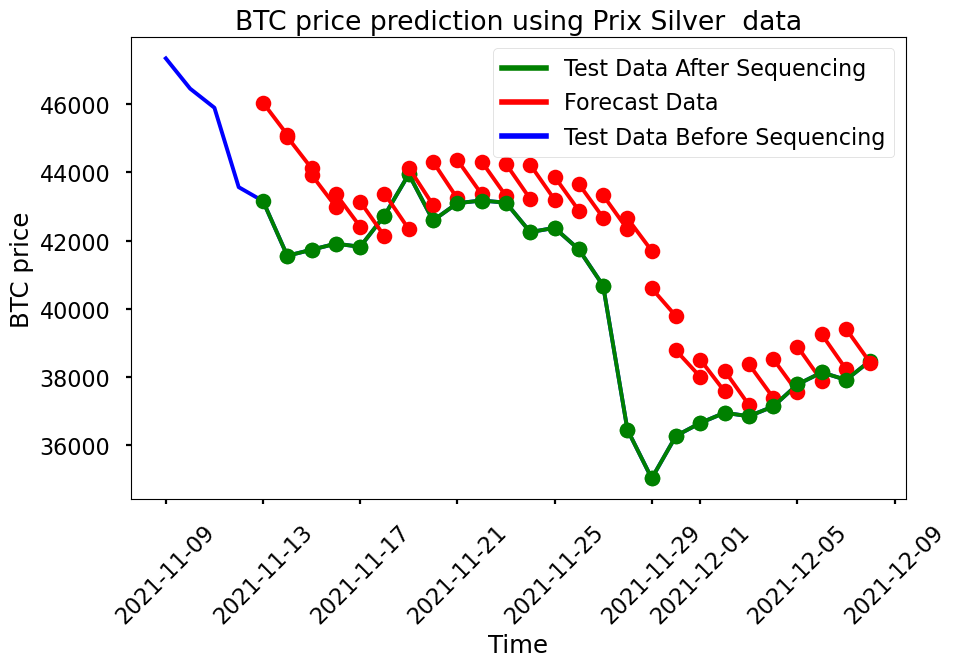

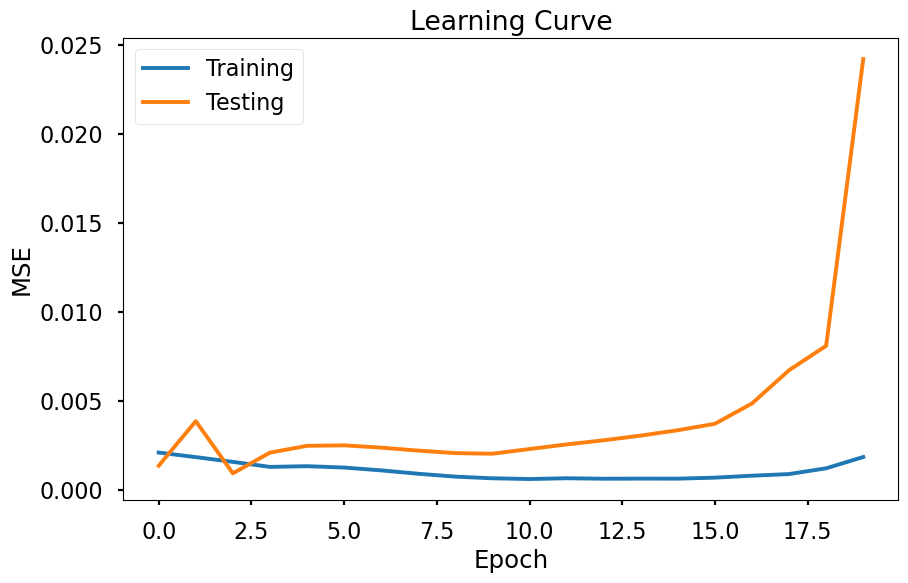

Epoch : 0 , training loss : 0.002110511716579467 , validation loss : 0.001371914497576654
Epoch : 1 , training loss : 0.0018542275252284904 , validation loss : 0.003873267909511924
Epoch : 2 , training loss : 0.0015880772839190092 , validation loss : 0.0009440843205084093
Epoch : 3 , training loss : 0.0013064317109823783 , validation loss : 0.002107000330579467
Epoch : 4 , training loss : 0.0013457058820663269 , validation loss : 0.0024880729266442358
Epoch : 5 , training loss : 0.0012702773904033242 , validation loss : 0.0025162209378322585
Epoch : 6 , training loss : 0.0011113420055614725 , validation loss : 0.0023865696915891022
Epoch : 7 , training loss : 0.0009207285306636755 , validation loss : 0.0022210734008695
Epoch : 8 , training loss : 0.0007600355019328704 , validation loss : 0.002079806409892626
Epoch : 9 , training loss : 0.000667138135203323 , validation loss : 0.0020458231592783704
Epoch : 10 , training loss : 0.0006256408040130482 , validation loss : 0.0023091176175512

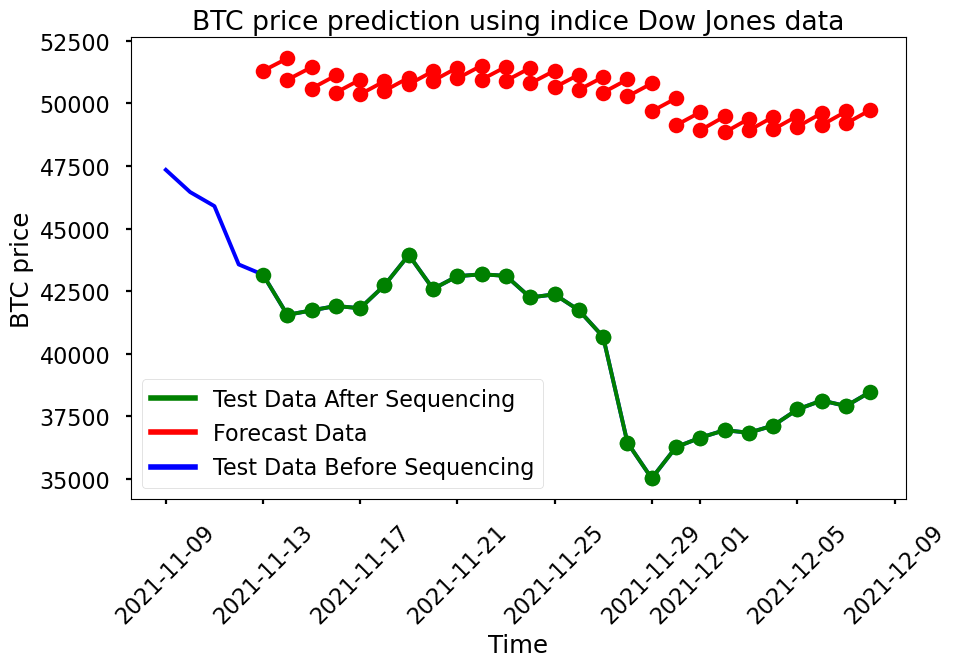

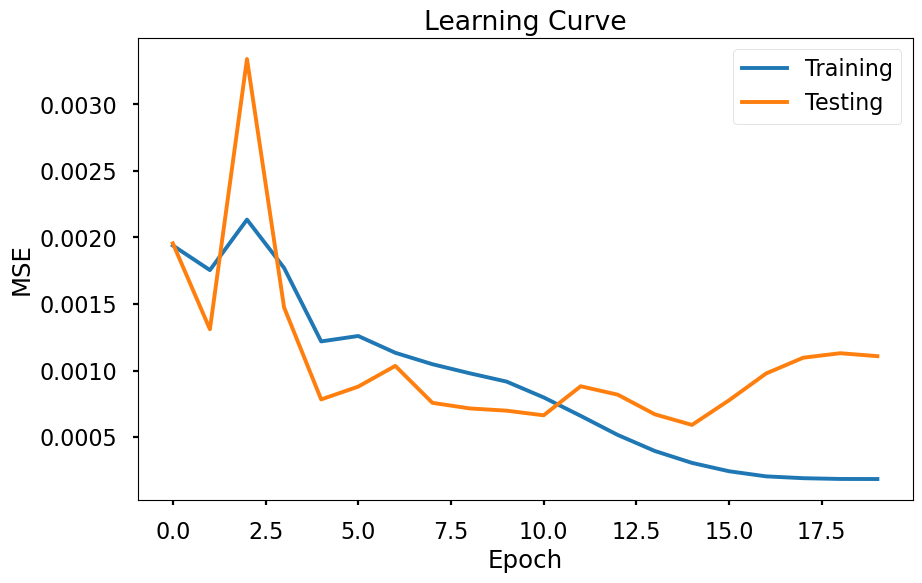

Epoch : 0 , training loss : 0.0019398021858237052 , validation loss : 0.0019560740445740523
Epoch : 1 , training loss : 0.0017548791317567802 , validation loss : 0.0013103241100907326
Epoch : 2 , training loss : 0.002134157440601793 , validation loss : 0.003340778814163059
Epoch : 3 , training loss : 0.0017714951573476545 , validation loss : 0.001474844419863075
Epoch : 4 , training loss : 0.0012191933258825908 , validation loss : 0.000783327521639876
Epoch : 5 , training loss : 0.001259765595946151 , validation loss : 0.0008793668181169778
Epoch : 6 , training loss : 0.001133657183955642 , validation loss : 0.0010352410143241286
Epoch : 7 , training loss : 0.0010477955074754458 , validation loss : 0.0007576173069537617
Epoch : 8 , training loss : 0.0009800239190667674 , validation loss : 0.0007157711646868847
Epoch : 9 , training loss : 0.0009171732449959929 , validation loss : 0.000698725062829908
Epoch : 10 , training loss : 0.0007984437155250857 , validation loss : 0.00066381236538

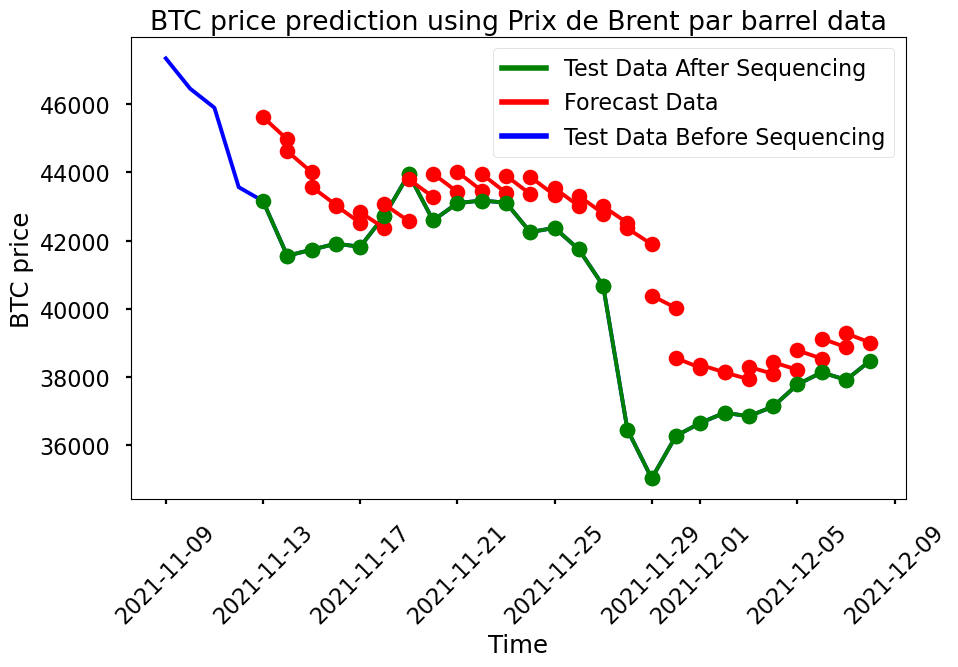

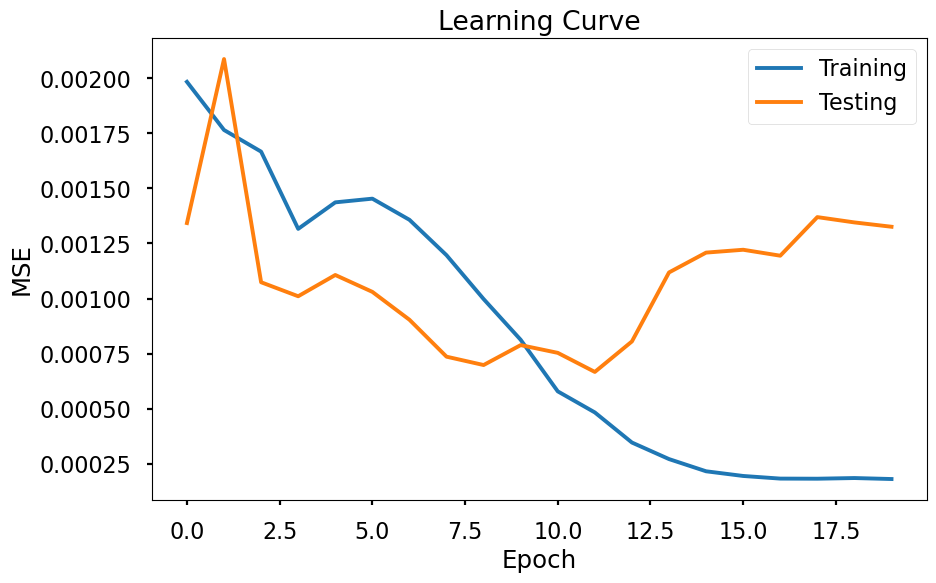

Epoch : 0 , training loss : 0.0019837755734248355 , validation loss : 0.0013426256104139612
Epoch : 1 , training loss : 0.0017651477085309814 , validation loss : 0.0020873315050266685
Epoch : 2 , training loss : 0.0016668741586485381 , validation loss : 0.0010738890938227995
Epoch : 3 , training loss : 0.001316204880091217 , validation loss : 0.001010305678937584
Epoch : 4 , training loss : 0.0014366058375741484 , validation loss : 0.0011068112158682196
Epoch : 5 , training loss : 0.0014533891118631475 , validation loss : 0.0010302434995537624
Epoch : 6 , training loss : 0.0013574020778384533 , validation loss : 0.0009036672301590443
Epoch : 7 , training loss : 0.0011966695295548269 , validation loss : 0.0007359912240644916
Epoch : 8 , training loss : 0.0009976765582821404 , validation loss : 0.0006980334874242544
Epoch : 9 , training loss : 0.0008126050270673454 , validation loss : 0.0007884476217441261
Epoch : 10 , training loss : 0.0005785147896373534 , validation loss : 0.000753360

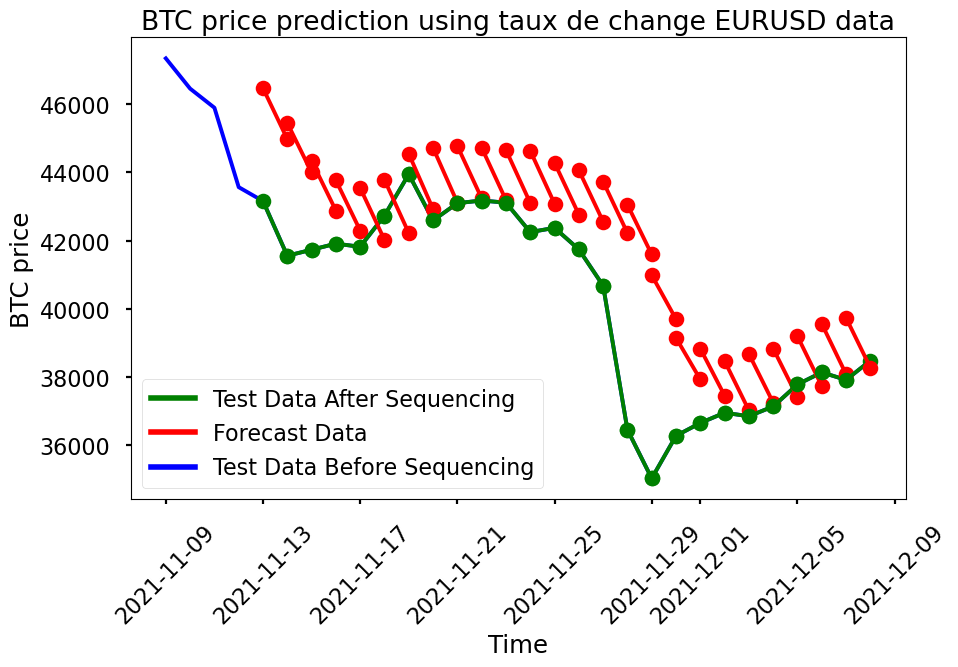

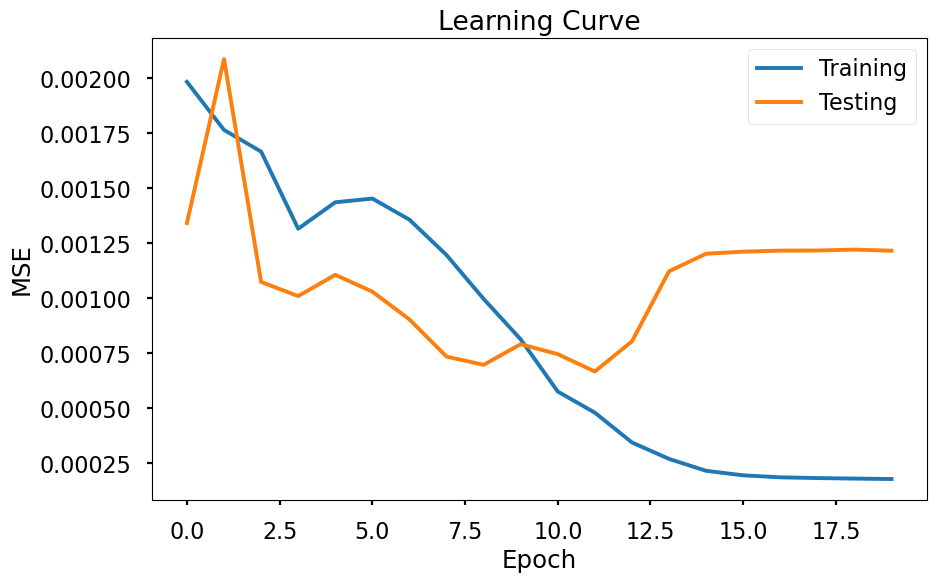

Epoch : 0 , training loss : 0.0019837938297000103 , validation loss : 0.0013420814706478269
Epoch : 1 , training loss : 0.0017652380246549165 , validation loss : 0.002087696312810294
Epoch : 2 , training loss : 0.0016667846146828417 , validation loss : 0.0010741412144852803
Epoch : 3 , training loss : 0.0013161366260754158 , validation loss : 0.001010015408974141
Epoch : 4 , training loss : 0.0014364914025253004 , validation loss : 0.001106582538341172
Epoch : 5 , training loss : 0.0014532768139070744 , validation loss : 0.0010301902366336435
Epoch : 6 , training loss : 0.0013573669812159943 , validation loss : 0.0009038338292157277
Epoch : 7 , training loss : 0.0011966389125337969 , validation loss : 0.0007348925442784094
Epoch : 8 , training loss : 0.0009973188234728362 , validation loss : 0.0006974409683607518
Epoch : 9 , training loss : 0.0008132955751647498 , validation loss : 0.0007912105997093022
Epoch : 10 , training loss : 0.0005759599689077042 , validation loss : 0.0007461027

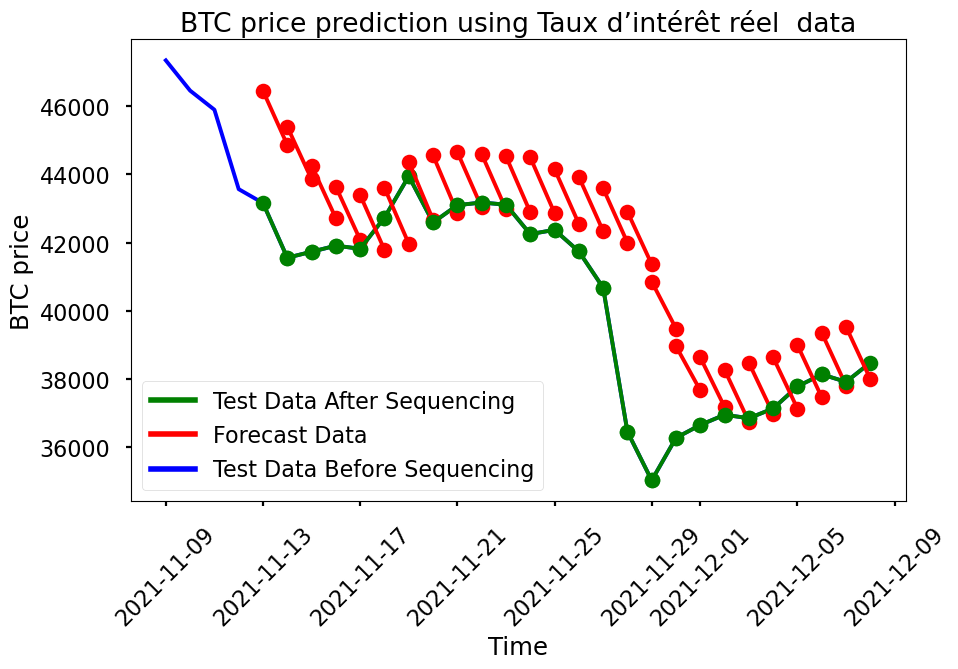

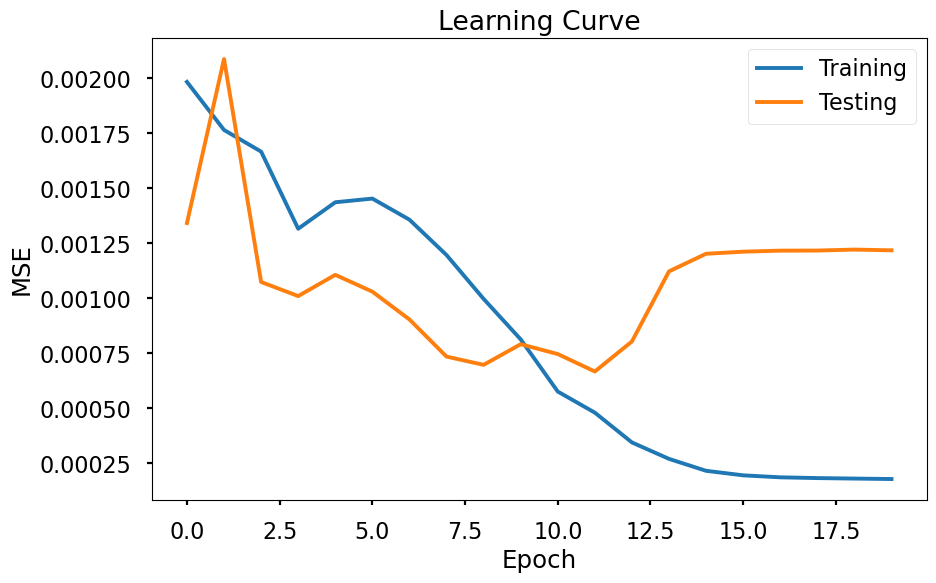

Epoch : 0 , training loss : 0.0019837936850961883 , validation loss : 0.0013420834147837013
Epoch : 1 , training loss : 0.0017652369542342174 , validation loss : 0.002087692261557095
Epoch : 2 , training loss : 0.0016667855867469454 , validation loss : 0.001074131455970928
Epoch : 3 , training loss : 0.0013161389922268856 , validation loss : 0.0010100215178681538
Epoch : 4 , training loss : 0.001436494369582256 , validation loss : 0.0011065863858675585
Epoch : 5 , training loss : 0.0014532788853946637 , validation loss : 0.0010301969770807773
Epoch : 6 , training loss : 0.0013573677638560678 , validation loss : 0.0009038346586748957
Epoch : 7 , training loss : 0.001196633887105565 , validation loss : 0.000734898418886587
Epoch : 8 , training loss : 0.0009973265624751042 , validation loss : 0.0006974487303523346
Epoch : 9 , training loss : 0.0008133020174753619 , validation loss : 0.0007912200759164989
Epoch : 10 , training loss : 0.0005760165377522865 , validation loss : 0.000746487407

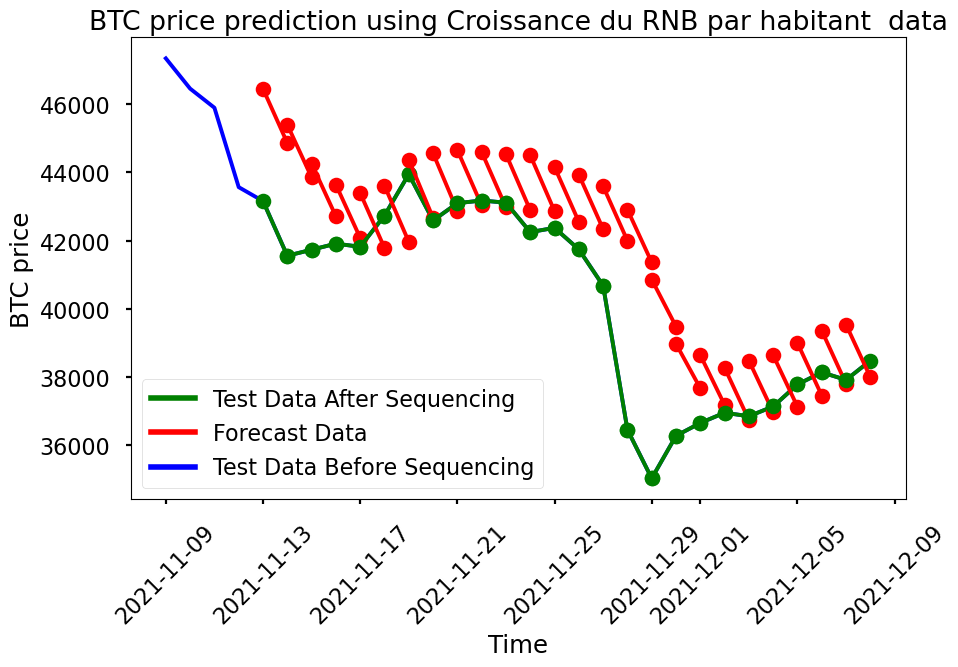

In [57]:
# Model Building
for i in val: 
    print('')
    print('Prediction using {}'.format(i))
    print('')
    btcdata = fill_btc
    prix = btcdata['Prix BTC ']
    btcdata = btcdata[[i]+['Prix BTC ']]
    btcdata['prix'] = prix

    print('')
    train_data = btcdata[:-30 ]
    test_data = btcdata[-30 :]
    train_time = btcdata.index[:-30 ]
    test_time= btcdata.index[-30 :]
    print("train_data_shape")
    print(btcdata.shape)
    print("test_data_shape")
    print(btcdata.shape)
    ## Data Normalization 
    
    scaler,train_data_normalized,test_data_normalized = data_module.multi_data_scaler(train_data,
                                                                                         test_data,
                                                                                         scale_mode = "Normalize")
    print("train_data_normalized_demand"+str(train_data_normalized.shape))
    print("test_data_normalized_demand"+str(test_data_normalized.shape))
    
    # Data Sequencing
    #Sequencing the data by taking in the multivariate series into x-feature and y-label
    #Hyperameter
    split_ratio = 0.70
    num_epochs = 20
    window_size = 5
    n_step = 2
    learning_rate = 0.001
    batch_size = 5
    #seed
    torch.manual_seed(123)
    trainX ,trainY=  data_module.multivariate_univariate_multi_step(train_data_normalized,window_size,n_step)
    testX , testY = data_module.multivariate_univariate_multi_step(test_data_normalized,window_size,n_step)
    print(f"trainX_demand shape:{trainX.shape} trainY_demand shape:{trainY.shape}\n")
    print(f"testX_demand shape:{testX.shape} testY_demand shape:{testY.shape}")
    
    trainY = trainY.reshape(trainY.shape[0],n_step,1)
    testY= testY.reshape(testY.shape[0],n_step,1)
    print(f"trainY shape:{trainY.shape}")
    print(f"testY shape:{testY.shape}")
    # Data Transform
    
    ### BEGIN SOLUTION
    train_data_dict ,test_data_dict = data_module.key_assign(trainingX = trainX  , 
                       testingX = testX, 
                       trainingY = trainY, 
                       testingY = testY)
    train_data_dict ,test_data_dict = data_module.transform(train_data_dict ,test_data_dict)
    ### END SOLUTION
    # Data Transpose 
    data_module.sanity_check(train_data_dict , test_data_dict)
    
    train_data_dict , test_data_dict = data_module.transpose(train_data_dict,
                                                                         test_data_dict)
    data_module.sanity_check(train_data_dict , test_data_dict)
    # Data Iterator
    ### BEGIN SOLUTION
    train_iter , test_iter = data_module.iterator(train_data_dict ,
                                                          test_data_dict,
                                                          batch_size = batch_size)
    ### END SOLUTION
    n_feature = train_data_dict['train_data_x_feature'].shape[1]
    ### BEGIN SOLUTION
    # Input the attribute need by the model 
        # seed
    torch.manual_seed(123)

    n_feature = train_data_dict['train_data_x_feature'].shape[1]
    ### BEGIN SOLUTION
    # Input the attribute need by the model 
    model = 0
    model = CNN(n_feature = n_feature,
                      n_step = n_step )

    ### END SOLUTION

    # Define the optimizer (Here we use Adam as our optimizer)
    ### BEGIN SOLUTION
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    ### END SOLUTION

    # Define the loss function (Here we use MSE as the loss function)
    ### BEGIN SOLUTION
    loss_fn = nn.MSELoss()
    ### END SOLUTION
    
    
    
    seq_length = train_data_dict['train_data_x_feature'].shape[2]

    # batch size ,input_dim ,seq_length
    inputs = torch.zeros((batch_size,
                      n_feature ,
                      seq_length),dtype=torch.float) 

    print(summary(model,inputs))
    
    torch.manual_seed(123)

    # Xavier weight intialization
  
    model.apply(weights_init)
    
    #seed
    torch.manual_seed(123)
    ### BEGIN SOLUTION

    # Start training 
    train_loss,val_loss= deep_learning_module.training(num_epochs= num_epochs ,
                                                    train_iter = train_iter,
                                                    test_iter = test_iter ,
                                                    optimizer = optimizer,
                                                    loss_fn = loss_fn,
                                                    model = model)
    ### END SOLUTION
   
    print(' ')
    print('LEARNING CURVE FOR MODEL {}'.format(i))
    print(' ')
    # Plot Learning Curve 
    ### BEGIN SOLUTION
    data_module.learning_curve(num_epochs = num_epochs,
                           train_loss = train_loss ,
                           val_loss = val_loss )

    # Section 1 : Make predictions

    ### BEGIN SOLUTION
    with torch.no_grad():
        y_train_prediction = model(train_data_dict['train_data_x_feature'])
        y_test_prediction = model(test_data_dict['test_data_x_feature'])
    ### END SOLUTION

    # Assign evaluation key
    ### BEGIN SOLUTION
    prediction , output = data_module.key_assign_evaluation(y_train_prediction,
                                                                        y_test_prediction,
                                                                        train_data_dict,
                                                                        test_data_dict)
    ### END SOLUTION


    # Section 2 : Reshape data
    ### BEGIN SOLUTION
    # Squeeze the output dimension
    output_data = data_module.squeeze_dimension(output)
    ### END SOLUTION    

    
    data_module.sanity_check(data_1 = output_data,data_2 = {})

    # Section 3 : Invert the scaling back to orignal data value
    ### BEGIN SOLUTION
    scaler_output = scaler[list(scaler)[-1]]
    prediction = data_module.inverse_scaler(prediction,scaler_output)
    output_data  = data_module.inverse_scaler(output_data ,scaler_output)
    ### END SOLUTION
    prediction['test_data_prediction'] = np.rint(prediction['test_data_prediction'])
    output_data['test_data_output'] =  np.rint(output_data['test_data_output']) 
    
    data_module.list_forecast_value(output_data,prediction) 
    trainScore,testScore = data_module.rmse(prediction,output_data)
    RMSE_dict['30 days {}'.format(i)] = testScore
    print('For {}'.format(i))
    print('Train Score: %.2f RMSE' % (trainScore))
    print('Test Score: %.2f RMSE' % (testScore))
    plot_details ={"x-axis" : "Time",
          "y-axis" : "BTC price",
          "title"  : "BTC price prediction using {} data".format(i)
         }
    data_module.multi_step_plot(original_test_data = test_data["prix"],
                                after_sequence_test_data = output_data,
                                forecast_data = prediction,
                                test_time = test_time,
                                window_size = window_size,
                                n_step = n_step,
                                details=plot_details,
                                original_plot=True,
                                multivariate = True)
    

# Prediction for 90 days 


Prediction using Prix Gold 


train_data_shape
(3697, 3)
test_data_shape
(3697, 3)
train_data_normalized_demand(3607, 3)
test_data_normalized_demand(90, 3)
trainX_demand shape:(3602, 5, 2) trainY_demand shape:(3602, 2)

testX_demand shape:(85, 5, 2) testY_demand shape:(85, 2)
trainY shape:(3602, 2, 1)
testY shape:(85, 2, 1)
train_data_x_feature shape : torch.Size([3602, 5, 2])
train_data_y_label shape : torch.Size([3602, 2, 1])
test_data_x_feature shape : torch.Size([85, 5, 2])
test_data_y_label shape : torch.Size([85, 2, 1])
train_data_x_feature shape : torch.Size([3602, 2, 5])
train_data_y_label shape : torch.Size([3602, 2, 1])
test_data_x_feature shape : torch.Size([85, 2, 5])
test_data_y_label shape : torch.Size([85, 2, 1])
        Kernel Shape Output Shape Params Mult-Adds
Layer                                             
0_conv1   [2, 30, 2]   [5, 30, 4]  150.0     480.0
1_poo1             -   [5, 30, 2]      -         -
2_conv2  [30, 20, 2]   [5, 20, 1]  1.22k      1.2k
3_pool

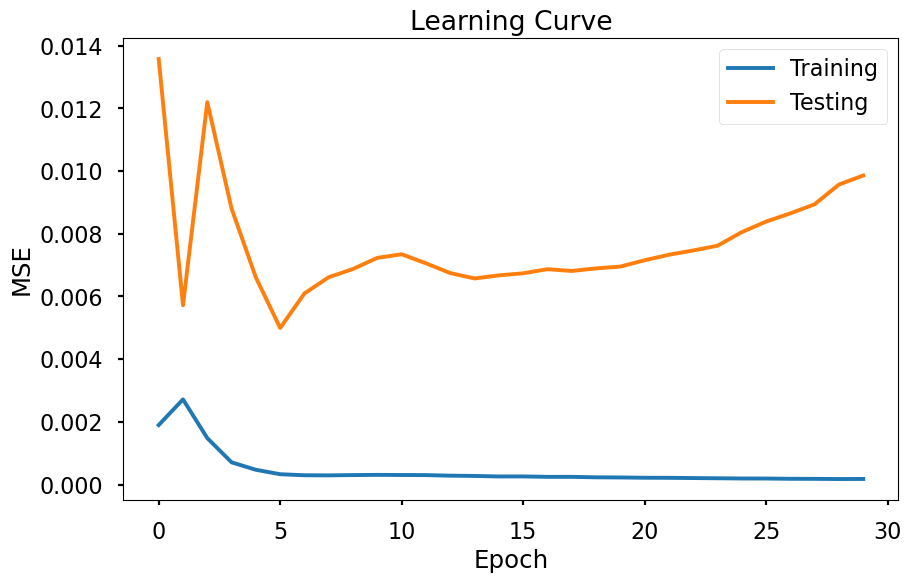

Epoch : 0 , training loss : 0.0018981058652969643 , validation loss : 0.013570228944231263
Epoch : 1 , training loss : 0.002716877137905642 , validation loss : 0.005718787534586976
Epoch : 2 , training loss : 0.0014821883872104327 , validation loss : 0.012193759218515718
Epoch : 3 , training loss : 0.0007098096245624897 , validation loss : 0.008800813681719935
Epoch : 4 , training loss : 0.00047138537590315935 , validation loss : 0.0066046428674941555
Epoch : 5 , training loss : 0.00033018873343766697 , validation loss : 0.004994159639703438
Epoch : 6 , training loss : 0.00029712283410186904 , validation loss : 0.006096004453652045
Epoch : 7 , training loss : 0.0002940177304786959 , validation loss : 0.006612862241180504
Epoch : 8 , training loss : 0.0003032295110942867 , validation loss : 0.006875431521193069
Epoch : 9 , training loss : 0.00030978871460121064 , validation loss : 0.0072311328669243
Epoch : 10 , training loss : 0.00030571207206163864 , validation loss : 0.00734355618410

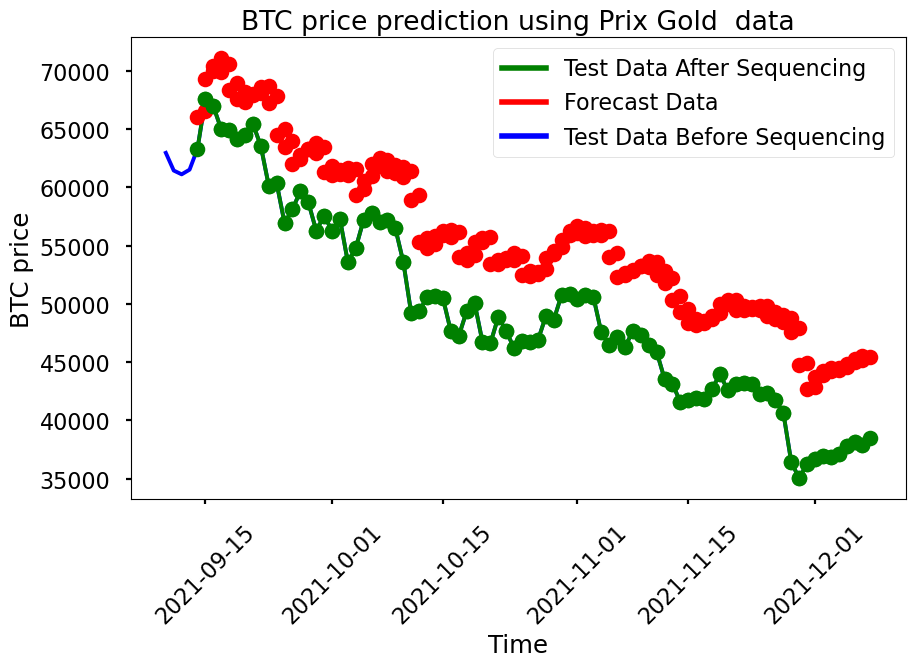

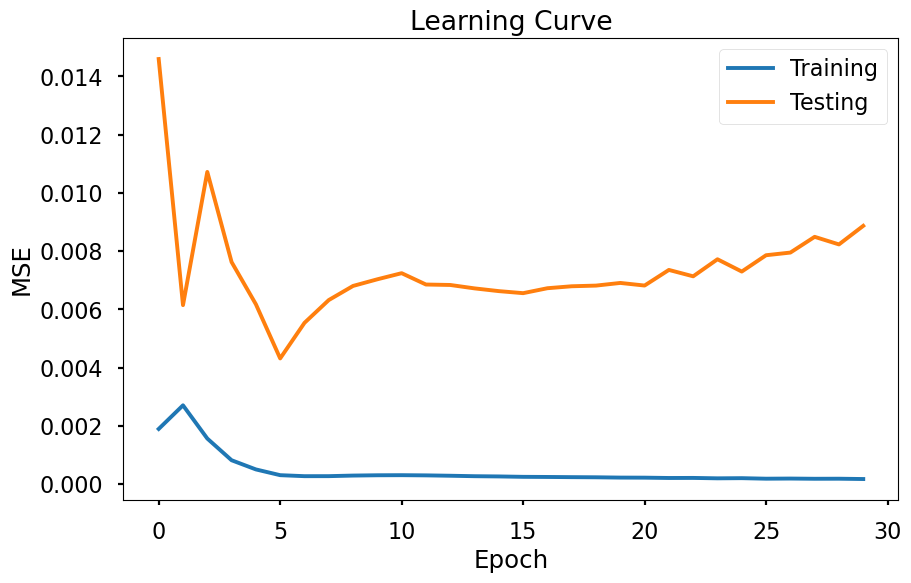

Epoch : 0 , training loss : 0.0018930462498154207 , validation loss : 0.014599205145393224
Epoch : 1 , training loss : 0.002704270514296994 , validation loss : 0.006146045942681239
Epoch : 2 , training loss : 0.0015634495848842532 , validation loss : 0.010721815941745745
Epoch : 3 , training loss : 0.0008177980736184278 , validation loss : 0.007626211941790055
Epoch : 4 , training loss : 0.00050257356206213 , validation loss : 0.00617607488461277
Epoch : 5 , training loss : 0.00030474860874023983 , validation loss : 0.004315177868942127
Epoch : 6 , training loss : 0.0002704500509986551 , validation loss : 0.005536527263329309
Epoch : 7 , training loss : 0.00027126397381095407 , validation loss : 0.006319732035455459
Epoch : 8 , training loss : 0.0002912212464771639 , validation loss : 0.006805003990473992
Epoch : 9 , training loss : 0.0003017324206592203 , validation loss : 0.007033325581099181
Epoch : 10 , training loss : 0.0003045790541993351 , validation loss : 0.007243276368278791


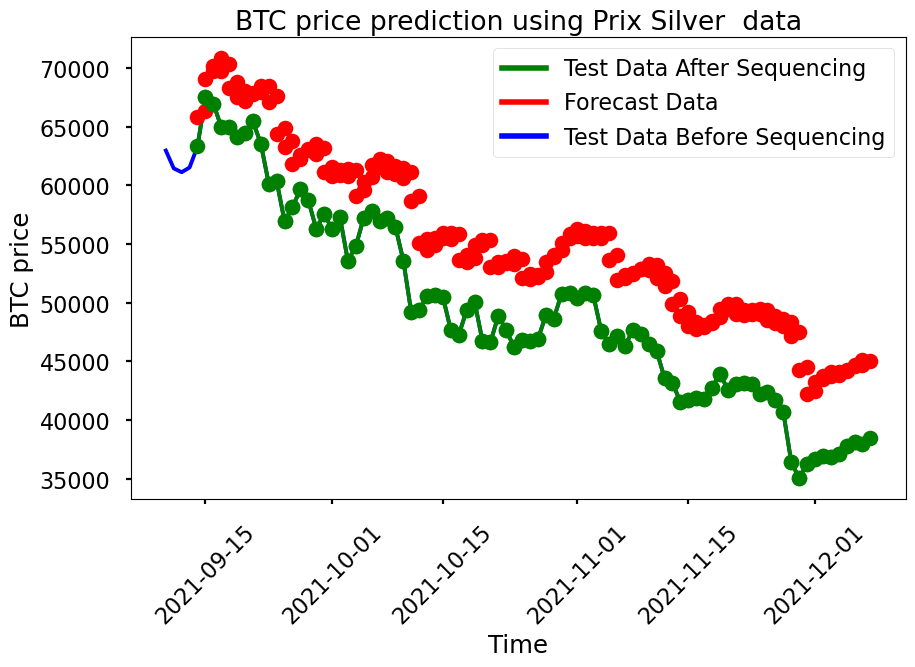

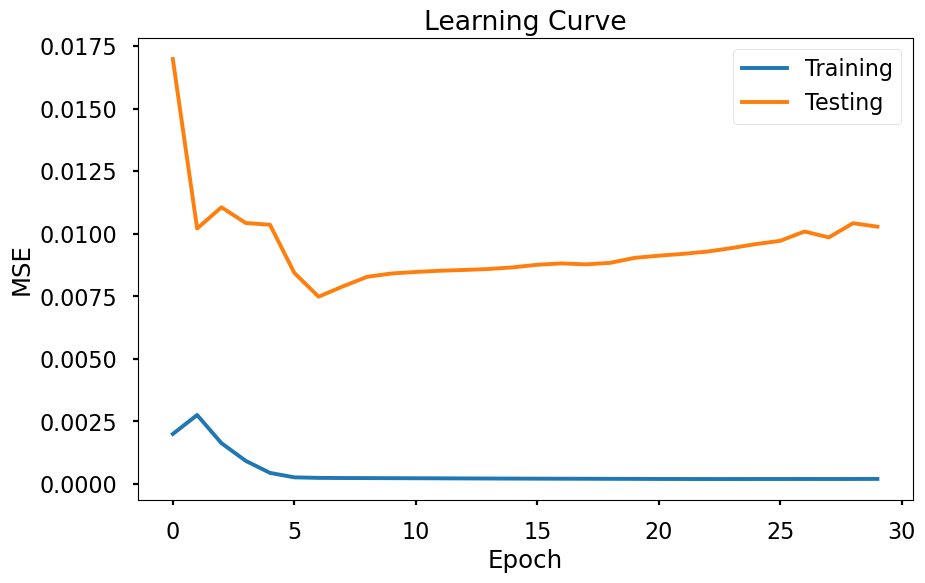

Epoch : 0 , training loss : 0.001989686106656421 , validation loss : 0.01698360262739965
Epoch : 1 , training loss : 0.0027486070439299436 , validation loss : 0.010206811672747684
Epoch : 2 , training loss : 0.0016249646859970229 , validation loss : 0.011055905323968652
Epoch : 3 , training loss : 0.0009160661886859673 , validation loss : 0.010426807837040327
Epoch : 4 , training loss : 0.0004343665822803973 , validation loss : 0.010356579564840478
Epoch : 5 , training loss : 0.00025633465480309753 , validation loss : 0.008432837264776668
Epoch : 6 , training loss : 0.00023522270051447617 , validation loss : 0.0074798798818579496
Epoch : 7 , training loss : 0.00022931634145792137 , validation loss : 0.00789149631472195
Epoch : 8 , training loss : 0.00022638799253887586 , validation loss : 0.008275215301717468
Epoch : 9 , training loss : 0.00022307873860431295 , validation loss : 0.00840781259980491
Epoch : 10 , training loss : 0.00022006453087541208 , validation loss : 0.00846908648279

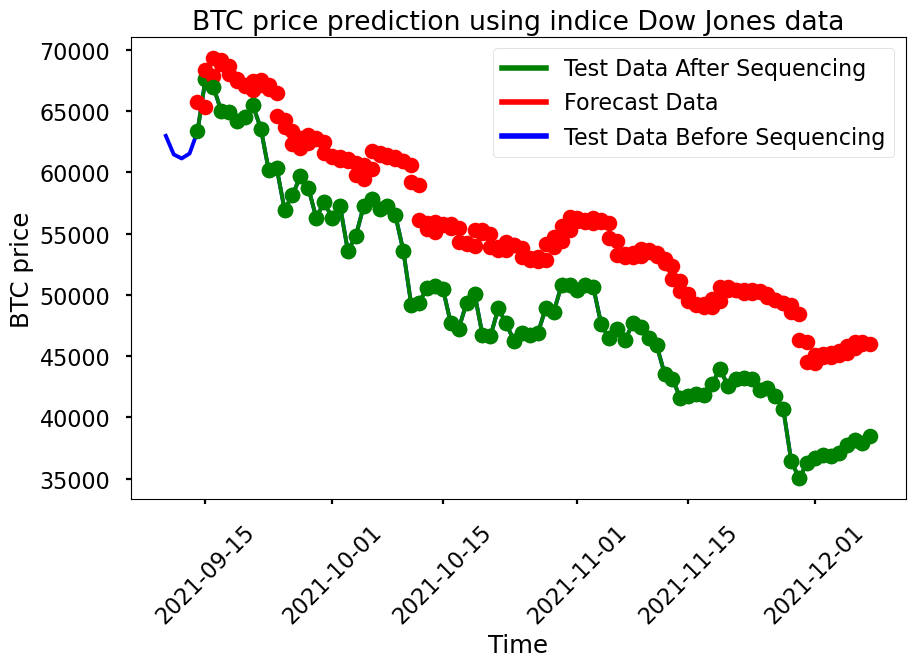

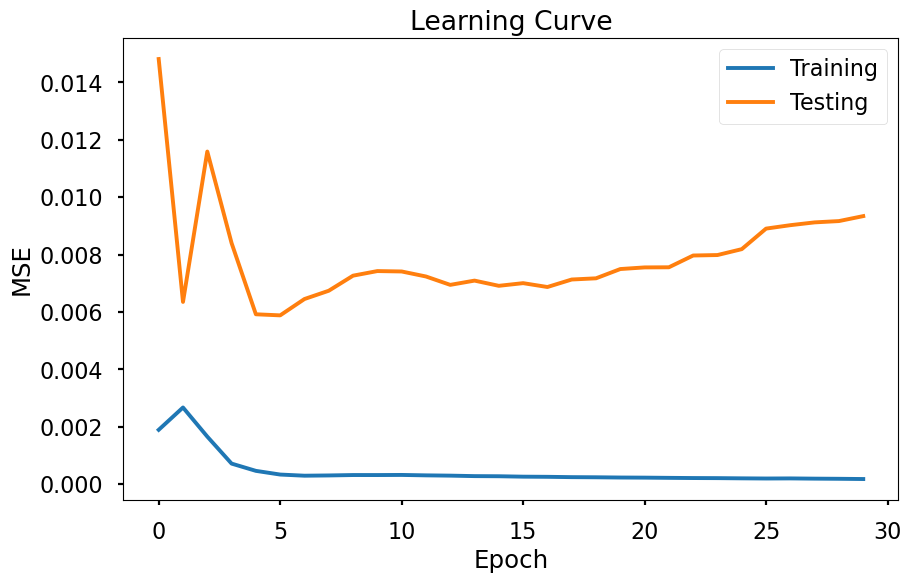

Epoch : 0 , training loss : 0.0018877307429498763 , validation loss : 0.014817981186377652
Epoch : 1 , training loss : 0.002666146667631442 , validation loss : 0.006348133564803421
Epoch : 2 , training loss : 0.0016511389333992215 , validation loss : 0.011592099580037244
Epoch : 3 , training loss : 0.0007098376167697847 , validation loss : 0.008399584371706141
Epoch : 4 , training loss : 0.00045646586674920716 , validation loss : 0.0059165503788629874
Epoch : 5 , training loss : 0.00032774243768076946 , validation loss : 0.005879206288441578
Epoch : 6 , training loss : 0.00028774425143063303 , validation loss : 0.006448814303011578
Epoch : 7 , training loss : 0.00029655920123530913 , validation loss : 0.0067377220154465995
Epoch : 8 , training loss : 0.00031072030711179954 , validation loss : 0.0072632540592595055
Epoch : 9 , training loss : 0.0003103716820129345 , validation loss : 0.007423422052798902
Epoch : 10 , training loss : 0.0003141838868340003 , validation loss : 0.0074096187

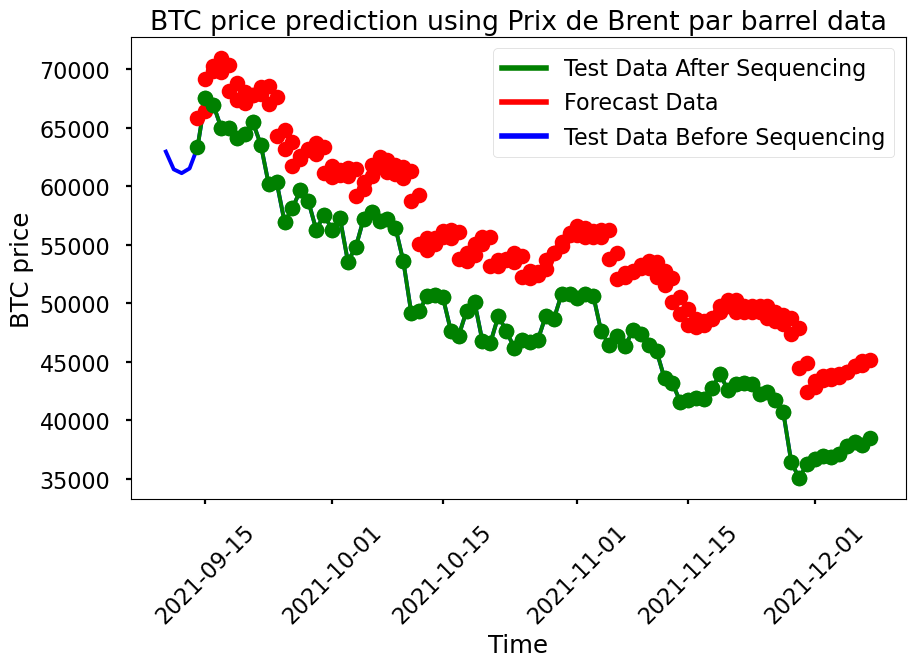

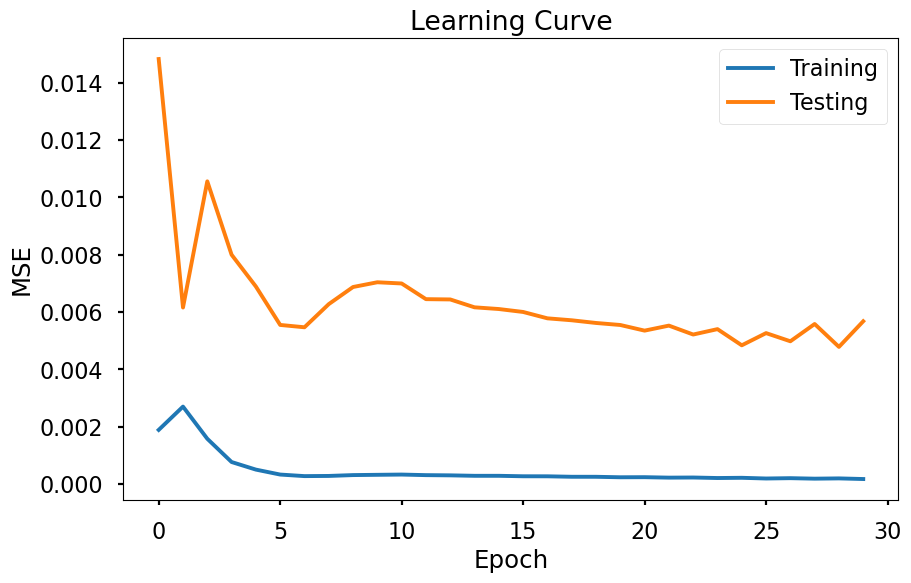

Epoch : 0 , training loss : 0.0018916874052518713 , validation loss : 0.014829759273732849
Epoch : 1 , training loss : 0.00270403466713626 , validation loss : 0.006161162537276088
Epoch : 2 , training loss : 0.0015825228183241125 , validation loss : 0.010562970392022501
Epoch : 3 , training loss : 0.0007711594268549893 , validation loss : 0.008003184284247896
Epoch : 4 , training loss : 0.0005065286662712241 , validation loss : 0.006893583710360176
Epoch : 5 , training loss : 0.0003337305084688852 , validation loss : 0.0055534071494441695
Epoch : 6 , training loss : 0.0002794400310588062 , validation loss : 0.0054716707262046195
Epoch : 7 , training loss : 0.00028551274516622167 , validation loss : 0.006279263350948253
Epoch : 8 , training loss : 0.00031520619812470306 , validation loss : 0.006876544561237097
Epoch : 9 , training loss : 0.00032473767607192334 , validation loss : 0.007041946313727428
Epoch : 10 , training loss : 0.00033345029839959036 , validation loss : 0.0069995844901

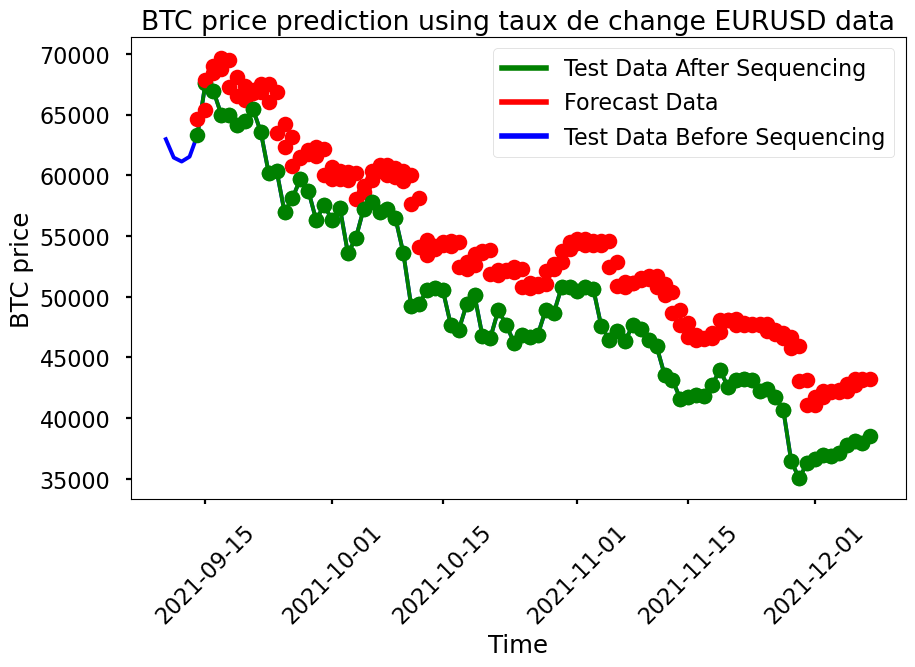

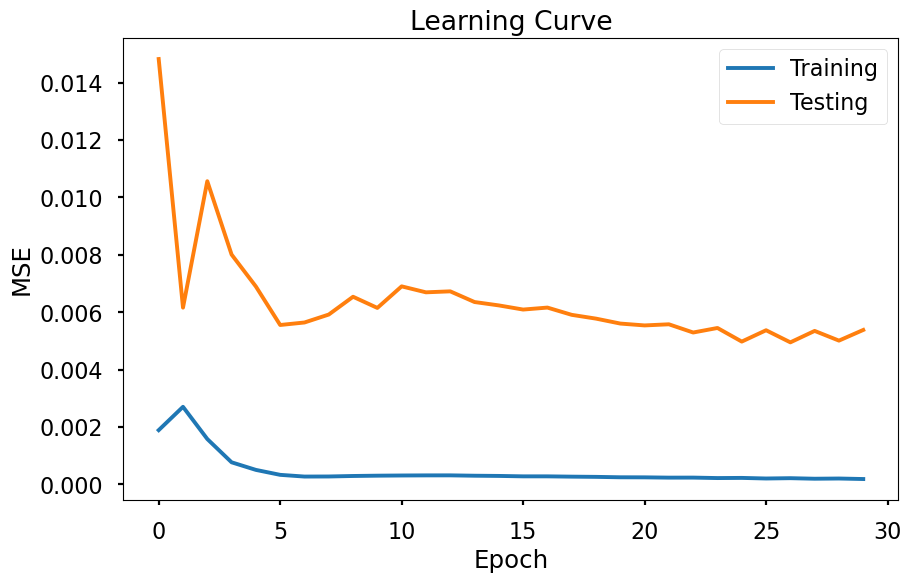

Epoch : 0 , training loss : 0.0018917241711540887 , validation loss : 0.01482410921359106
Epoch : 1 , training loss : 0.0027042860619681136 , validation loss : 0.006161127527080038
Epoch : 2 , training loss : 0.0015827081810798084 , validation loss : 0.010566641467020792
Epoch : 3 , training loss : 0.0007710915710177521 , validation loss : 0.008010809282388757
Epoch : 4 , training loss : 0.0005065658074149647 , validation loss : 0.0068972790613770485
Epoch : 5 , training loss : 0.00033384577963441805 , validation loss : 0.005555977764101151
Epoch : 6 , training loss : 0.00027429178202654933 , validation loss : 0.005643102313008378
Epoch : 7 , training loss : 0.0002769098950774884 , validation loss : 0.00592000298338997
Epoch : 8 , training loss : 0.000294206642871313 , validation loss : 0.006540150080314454
Epoch : 9 , training loss : 0.0003049041404558312 , validation loss : 0.006150765303412781
Epoch : 10 , training loss : 0.00031141525677912623 , validation loss : 0.0069021989235325

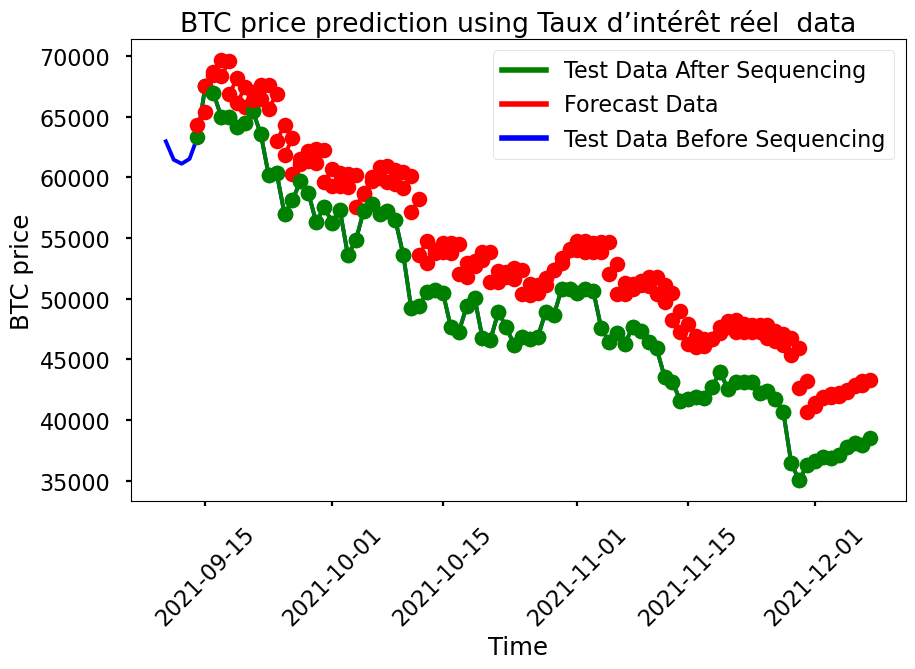

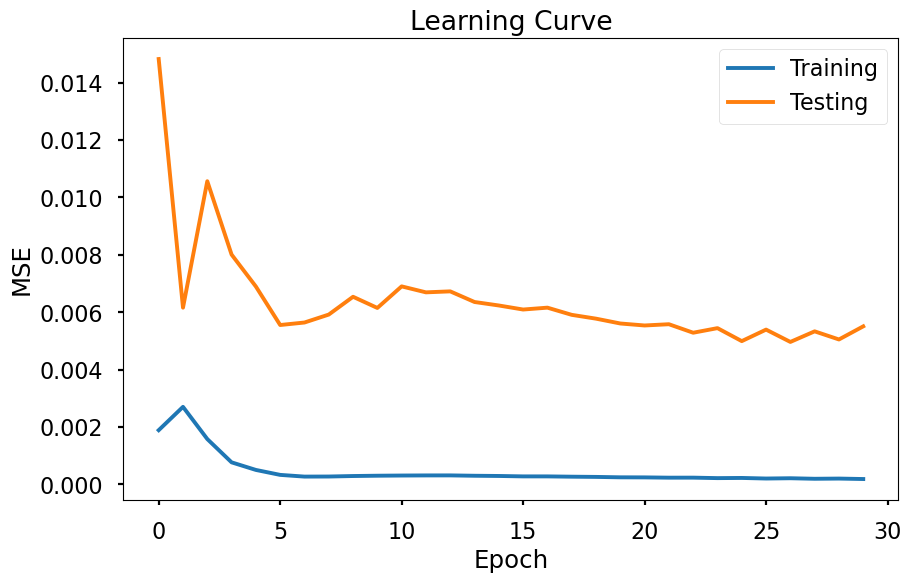

Epoch : 0 , training loss : 0.0018917239580058033 , validation loss : 0.014824136995765217
Epoch : 1 , training loss : 0.00270428562458023 , validation loss : 0.0061611283522592306
Epoch : 2 , training loss : 0.0015827088391064746 , validation loss : 0.010566649711964762
Epoch : 3 , training loss : 0.0007710918046188085 , validation loss : 0.00801081063828486
Epoch : 4 , training loss : 0.0005065656243302639 , validation loss : 0.006897280170746586
Epoch : 5 , training loss : 0.0003338461968533319 , validation loss : 0.005555964143508498
Epoch : 6 , training loss : 0.0002742917936433086 , validation loss : 0.00564310879117864
Epoch : 7 , training loss : 0.00027690987408746695 , validation loss : 0.005920036346651614
Epoch : 8 , training loss : 0.0002942071785074846 , validation loss : 0.006540156887186801
Epoch : 9 , training loss : 0.000304904073817799 , validation loss : 0.0061507737948833146
Epoch : 10 , training loss : 0.0003114151849052624 , validation loss : 0.006902198827661136


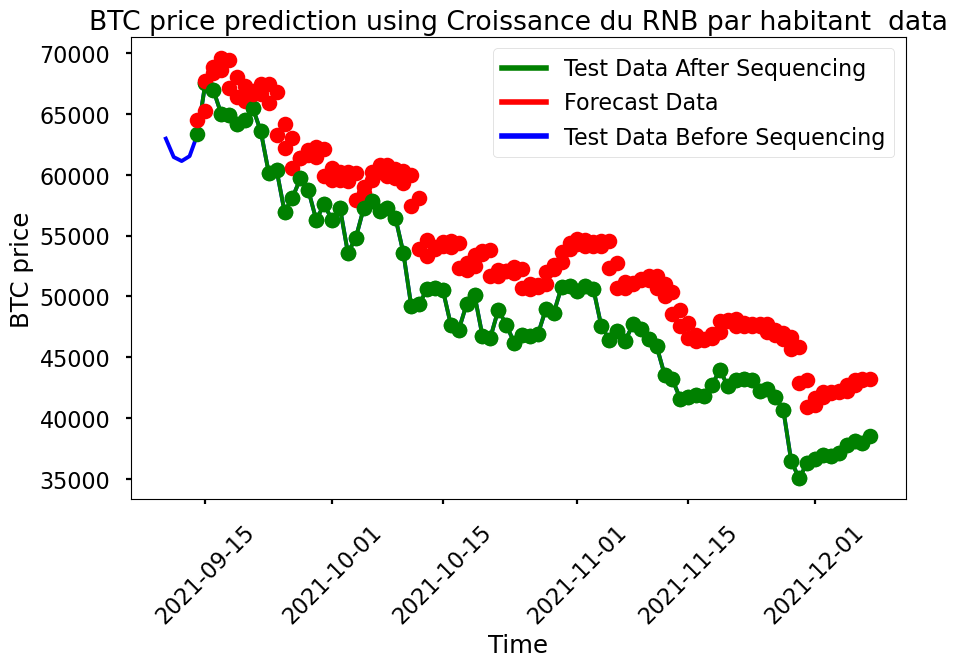

In [58]:
# Model Building
for i in val: 
    print('')
    print('Prediction using {}'.format(i))
    print('')
    btcdata = fill_btc
    prix = btcdata['Prix BTC ']
    btcdata = btcdata[[i]+['Prix BTC ']]
    btcdata['prix'] = prix

    print('')
    train_data = btcdata[:-90 ]
    test_data = btcdata[-90 :]
    train_time = btcdata.index[:-90 ]
    test_time= btcdata.index[-90 :]
    print("train_data_shape")
    print(btcdata.shape)
    print("test_data_shape")
    print(btcdata.shape)
    ## Data Normalization 
    
    scaler,train_data_normalized,test_data_normalized = data_module.multi_data_scaler(train_data,
                                                                                         test_data,
                                                                                         scale_mode = "Normalize")
    print("train_data_normalized_demand"+str(train_data_normalized.shape))
    print("test_data_normalized_demand"+str(test_data_normalized.shape))
    
    # Data Sequencing
    #Sequencing the data by taking in the multivariate series into x-feature and y-label
    #Hyperameter
    split_ratio = 0.70
    num_epochs = 30
    window_size = 5
    n_step = 2
    learning_rate = 0.001
    batch_size = 5
    #seed
    torch.manual_seed(123)
    trainX ,trainY=  data_module.multivariate_univariate_multi_step(train_data_normalized,window_size,n_step)
    testX , testY = data_module.multivariate_univariate_multi_step(test_data_normalized,window_size,n_step)
    print(f"trainX_demand shape:{trainX.shape} trainY_demand shape:{trainY.shape}\n")
    print(f"testX_demand shape:{testX.shape} testY_demand shape:{testY.shape}")
    
    trainY = trainY.reshape(trainY.shape[0],n_step,1)
    testY= testY.reshape(testY.shape[0],n_step,1)
    print(f"trainY shape:{trainY.shape}")
    print(f"testY shape:{testY.shape}")
    # Data Transform
    
    ### BEGIN SOLUTION
    train_data_dict ,test_data_dict = data_module.key_assign(trainingX = trainX  , 
                       testingX = testX, 
                       trainingY = trainY, 
                       testingY = testY)
    train_data_dict ,test_data_dict = data_module.transform(train_data_dict ,test_data_dict)
    ### END SOLUTION
    # Data Transpose 
    data_module.sanity_check(train_data_dict , test_data_dict)
    
    train_data_dict , test_data_dict = data_module.transpose(train_data_dict,
                                                                         test_data_dict)
    data_module.sanity_check(train_data_dict , test_data_dict)
    # Data Iterator
    ### BEGIN SOLUTION
    train_iter , test_iter = data_module.iterator(train_data_dict ,
                                                          test_data_dict,
                                                          batch_size = batch_size)
    ### END SOLUTION
    n_feature = train_data_dict['train_data_x_feature'].shape[1]
    ### BEGIN SOLUTION
    # Input the attribute need by the model 
        # seed
    torch.manual_seed(123)

    n_feature = train_data_dict['train_data_x_feature'].shape[1]
    ### BEGIN SOLUTION
    # Input the attribute need by the model 
    model = 0
    model = CNN(n_feature = n_feature,
                      n_step = n_step )

    ### END SOLUTION

    # Define the optimizer (Here we use Adam as our optimizer)
    ### BEGIN SOLUTION
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    ### END SOLUTION

    # Define the loss function (Here we use MSE as the loss function)
    ### BEGIN SOLUTION
    loss_fn = nn.MSELoss()
    ### END SOLUTION
    
    
    
    seq_length = train_data_dict['train_data_x_feature'].shape[2]

    # batch size ,input_dim ,seq_length
    inputs = torch.zeros((batch_size,
                      n_feature ,
                      seq_length),dtype=torch.float) 

    print(summary(model,inputs))
    
    torch.manual_seed(123)

    # Xavier weight intialization
  
    model.apply(weights_init)
    
    #seed
    torch.manual_seed(123)
    ### BEGIN SOLUTION

    # Start training 
    train_loss,val_loss= deep_learning_module.training(num_epochs= num_epochs ,
                                                    train_iter = train_iter,
                                                    test_iter = test_iter ,
                                                    optimizer = optimizer,
                                                    loss_fn = loss_fn,
                                                    model = model)
    ### END SOLUTION
   
    print(' ')
    print('LEARNING CURVE FOR MODEL {}'.format(i))
    print(' ')
    # Plot Learning Curve 
    ### BEGIN SOLUTION
    data_module.learning_curve(num_epochs = num_epochs,
                           train_loss = train_loss ,
                           val_loss = val_loss )

    # Section 1 : Make predictions

    ### BEGIN SOLUTION
    with torch.no_grad():
        y_train_prediction = model(train_data_dict['train_data_x_feature'])
        y_test_prediction = model(test_data_dict['test_data_x_feature'])
    ### END SOLUTION

    # Assign evaluation key
    ### BEGIN SOLUTION
    prediction , output = data_module.key_assign_evaluation(y_train_prediction,
                                                                        y_test_prediction,
                                                                        train_data_dict,
                                                                        test_data_dict)
    ### END SOLUTION


    # Section 2 : Reshape data
    ### BEGIN SOLUTION
    # Squeeze the output dimension
    output_data = data_module.squeeze_dimension(output)
    ### END SOLUTION    

    
    data_module.sanity_check(data_1 = output_data,data_2 = {})

    # Section 3 : Invert the scaling back to orignal data value
    ### BEGIN SOLUTION
    scaler_output = scaler[list(scaler)[-1]]
    prediction = data_module.inverse_scaler(prediction,scaler_output)
    output_data  = data_module.inverse_scaler(output_data ,scaler_output)
    ### END SOLUTION
    prediction['test_data_prediction'] = np.rint(prediction['test_data_prediction'])
    output_data['test_data_output'] =  np.rint(output_data['test_data_output']) 
    
    data_module.list_forecast_value(output_data,prediction) 
    trainScore,testScore = data_module.rmse(prediction,output_data)
    print('Score for {}'.format(i))
    print('Train Score: %.2f RMSE' % (trainScore))
    print('Test Score: %.2f RMSE' % (testScore))
    RMSE_dict['90 days {}'.format(i)] = testScore
    plot_details ={"x-axis" : "Time",
          "y-axis" : "BTC price",
          "title"  : "BTC price prediction using {} data".format(i)
         }
    data_module.multi_step_plot(original_test_data = test_data["prix"],
                                after_sequence_test_data = output_data,
                                forecast_data = prediction,
                                test_time = test_time,
                                window_size = window_size,
                                n_step = n_step,
                                details=plot_details,
                                original_plot=True,
                                multivariate = True)
    


Prediction using ['Prix Gold ', 'Prix Silver ', 'indice Dow Jones', 'Prix de Brent par barrel', 'taux de change EURUSD', 'Taux d’intérêt réel ', 'Croissance du RNB par habitant ']


train_data_shape
(3697, 9)
test_data_shape
(3697, 9)
train_data_normalized_demand(3607, 9)
test_data_normalized_demand(90, 9)
trainX_demand shape:(3602, 5, 8) trainY_demand shape:(3602, 2)

testX_demand shape:(85, 5, 8) testY_demand shape:(85, 2)
trainY shape:(3602, 2, 1)
testY shape:(85, 2, 1)
train_data_x_feature shape : torch.Size([3602, 5, 8])
train_data_y_label shape : torch.Size([3602, 2, 1])
test_data_x_feature shape : torch.Size([85, 5, 8])
test_data_y_label shape : torch.Size([85, 2, 1])
train_data_x_feature shape : torch.Size([3602, 8, 5])
train_data_y_label shape : torch.Size([3602, 2, 1])
test_data_x_feature shape : torch.Size([85, 8, 5])
test_data_y_label shape : torch.Size([85, 2, 1])
        Kernel Shape Output Shape Params Mult-Adds
Layer                                             
0_conv1

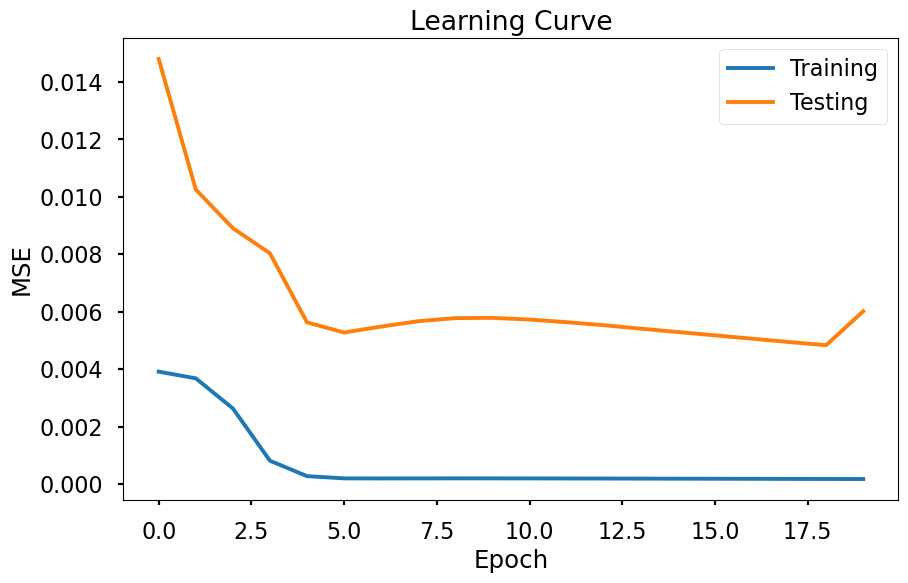

Epoch : 0 , training loss : 0.003909853179641086 , validation loss : 0.014791806940646732
Epoch : 1 , training loss : 0.003676919091391535 , validation loss : 0.01025092788040638
Epoch : 2 , training loss : 0.0026300610359376608 , validation loss : 0.008903935722842374
Epoch : 3 , training loss : 0.0008095633923217752 , validation loss : 0.008028700441012488
Epoch : 4 , training loss : 0.0002727643902408259 , validation loss : 0.005625057917581324
Epoch : 5 , training loss : 0.00019534162921613156 , validation loss : 0.005271633450106224
Epoch : 6 , training loss : 0.0001925377334688209 , validation loss : 0.005479596527841161
Epoch : 7 , training loss : 0.0001946432089244138 , validation loss : 0.005666772232336157
Epoch : 8 , training loss : 0.00019585930751589103 , validation loss : 0.0057729721986962594
Epoch : 9 , training loss : 0.00019547059115724696 , validation loss : 0.005782021332860869
Epoch : 10 , training loss : 0.00019384014100743918 , validation loss : 0.005723875591202

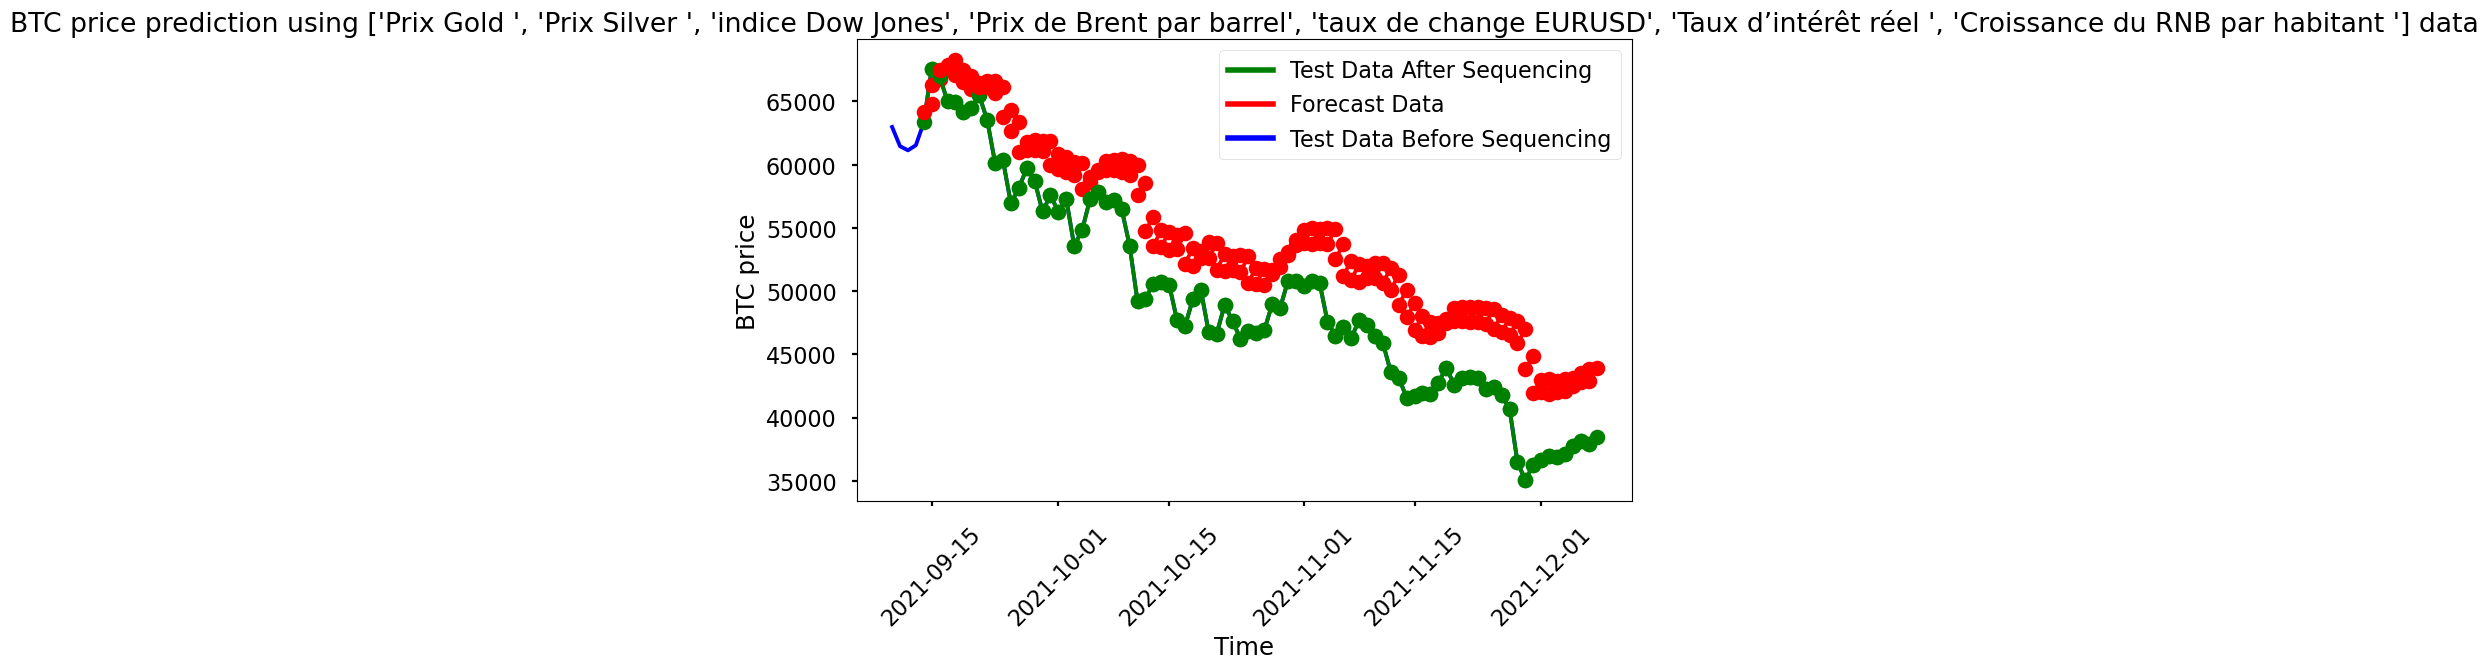

In [59]:
# Model Building
for i in [val]: 
    print('')
    print('Prediction using {}'.format(i))
    print('')
    btcdata = fill_btc
    prix = btcdata['Prix BTC ']
    btcdata = btcdata[i+['Prix BTC ']]
    btcdata['prix'] = prix

    print('')
    train_data = btcdata[:-90 ]
    test_data = btcdata[-90 :]
    train_time = btcdata.index[:-90 ]
    test_time= btcdata.index[-90 :]
    print("train_data_shape")
    print(btcdata.shape)
    print("test_data_shape")
    print(btcdata.shape)
    ## Data Normalization 
    
    scaler,train_data_normalized,test_data_normalized = data_module.multi_data_scaler(train_data,
                                                                                         test_data,
                                                                                         scale_mode = "Normalize")
    print("train_data_normalized_demand"+str(train_data_normalized.shape))
    print("test_data_normalized_demand"+str(test_data_normalized.shape))
    
    # Data Sequencing
    #Sequencing the data by taking in the multivariate series into x-feature and y-label
    #Hyperameter
    split_ratio = 0.70
    num_epochs = 20
    window_size = 5
    n_step = 2
    learning_rate = 0.001
    batch_size = 5
    #seed
    torch.manual_seed(123)
    trainX ,trainY=  data_module.multivariate_univariate_multi_step(train_data_normalized,window_size,n_step)
    testX , testY = data_module.multivariate_univariate_multi_step(test_data_normalized,window_size,n_step)
    print(f"trainX_demand shape:{trainX.shape} trainY_demand shape:{trainY.shape}\n")
    print(f"testX_demand shape:{testX.shape} testY_demand shape:{testY.shape}")
    
    trainY = trainY.reshape(trainY.shape[0],n_step,1)
    testY= testY.reshape(testY.shape[0],n_step,1)
    print(f"trainY shape:{trainY.shape}")
    print(f"testY shape:{testY.shape}")
    # Data Transform
    
    ### BEGIN SOLUTION
    train_data_dict ,test_data_dict = data_module.key_assign(trainingX = trainX  , 
                       testingX = testX, 
                       trainingY = trainY, 
                       testingY = testY)
    train_data_dict ,test_data_dict = data_module.transform(train_data_dict ,test_data_dict)
    ### END SOLUTION
    # Data Transpose 
    data_module.sanity_check(train_data_dict , test_data_dict)
    
    train_data_dict , test_data_dict = data_module.transpose(train_data_dict,
                                                                         test_data_dict)
    data_module.sanity_check(train_data_dict , test_data_dict)
    # Data Iterator
    ### BEGIN SOLUTION
    train_iter , test_iter = data_module.iterator(train_data_dict ,
                                                          test_data_dict,
                                                          batch_size = batch_size)
    ### END SOLUTION
    n_feature = train_data_dict['train_data_x_feature'].shape[1]
    ### BEGIN SOLUTION
    # Input the attribute need by the model 
        # seed
    torch.manual_seed(123)

    n_feature = train_data_dict['train_data_x_feature'].shape[1]
    ### BEGIN SOLUTION
    # Input the attribute need by the model 
    model = 0
    model = CNN(n_feature = n_feature,
                      n_step = n_step )

    ### END SOLUTION

    # Define the optimizer (Here we use Adam as our optimizer)
    ### BEGIN SOLUTION
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    ### END SOLUTION

    # Define the loss function (Here we use MSE as the loss function)
    ### BEGIN SOLUTION
    loss_fn = nn.MSELoss()
    ### END SOLUTION
    
    
    
    seq_length = train_data_dict['train_data_x_feature'].shape[2]

    # batch size ,input_dim ,seq_length
    inputs = torch.zeros((batch_size,
                      n_feature ,
                      seq_length),dtype=torch.float) 

    print(summary(model,inputs))
    
    torch.manual_seed(123)

    # Xavier weight intialization
  
    model.apply(weights_init)
    
    #seed
    torch.manual_seed(123)
    ### BEGIN SOLUTION

    # Start training 
    train_loss,val_loss= deep_learning_module.training(num_epochs= num_epochs ,
                                                    train_iter = train_iter,
                                                    test_iter = test_iter ,
                                                    optimizer = optimizer,
                                                    loss_fn = loss_fn,
                                                    model = model)
    ### END SOLUTION
   
    print(' ')
    print('LEARNING CURVE FOR MODEL {}'.format(i))
    print(' ')
    # Plot Learning Curve 
    ### BEGIN SOLUTION
    data_module.learning_curve(num_epochs = num_epochs,
                           train_loss = train_loss ,
                           val_loss = val_loss )

    # Section 1 : Make predictions

    ### BEGIN SOLUTION
    with torch.no_grad():
        y_train_prediction = model(train_data_dict['train_data_x_feature'])
        y_test_prediction = model(test_data_dict['test_data_x_feature'])
    ### END SOLUTION

    # Assign evaluation key
    ### BEGIN SOLUTION
    prediction , output = data_module.key_assign_evaluation(y_train_prediction,
                                                                        y_test_prediction,
                                                                        train_data_dict,
                                                                        test_data_dict)
    ### END SOLUTION


    # Section 2 : Reshape data
    ### BEGIN SOLUTION
    # Squeeze the output dimension
    output_data = data_module.squeeze_dimension(output)
    ### END SOLUTION    

    
    data_module.sanity_check(data_1 = output_data,data_2 = {})

    # Section 3 : Invert the scaling back to orignal data value
    ### BEGIN SOLUTION
    scaler_output = scaler[list(scaler)[-1]]
    prediction = data_module.inverse_scaler(prediction,scaler_output)
    output_data  = data_module.inverse_scaler(output_data ,scaler_output)
    ### END SOLUTION
    prediction['test_data_prediction'] = np.rint(prediction['test_data_prediction'])
    output_data['test_data_output'] =  np.rint(output_data['test_data_output']) 
    
    data_module.list_forecast_value(output_data,prediction) 
    trainScore,testScore = data_module.rmse(prediction,output_data)
    print('Score for {}'.format(i))
    print('Train Score: %.2f RMSE' % (trainScore))
    print('Test Score: %.2f RMSE' % (testScore))
    RMSE_dict['No feature selection {}'.format(i)] = testScore
    plot_details ={"x-axis" : "Time",
          "y-axis" : "BTC price",
          "title"  : "BTC price prediction using {} data".format(i)
         }
    data_module.multi_step_plot(original_test_data = test_data["prix"],
                                after_sequence_test_data = output_data,
                                forecast_data = prediction,
                                test_time = test_time,
                                window_size = window_size,
                                n_step = n_step,
                                details=plot_details,
                                original_plot=True,
                                multivariate = True)
    

In [60]:
val

['Prix Gold ',
 'Prix Silver ',
 'indice Dow Jones',
 'Prix de Brent par barrel',
 'taux de change EURUSD',
 'Taux d’intérêt réel ',
 'Croissance du RNB par habitant ']

### Ici, on a les RMSE de tous les prédictions des modèles : Ils faut comparer, les modèles avec et sans feature selection pour savoir si elles influent sur le résultat. Une meilleur RMSE veut dire que le model est améliorer, combiner ça avec les résultats d'analyse précédant pour en déduire un influence ou pas sur le prix du Bitcoin de ces variables. Le reste du travail est un travail pour un analyste financier. Bon courage pour la suite. 



In [62]:
RMSE_dict

{'No Selection ': 2641.509416981132,
 '30 days Prix Gold ': 2042.0050807968132,
 '30 days Prix Silver ': 2311.957395801229,
 '30 days indice Dow Jones': 10508.883860810338,
 '30 days Prix de Brent par barrel': 2249.3909175596846,
 '30 days taux de change EURUSD': 2460.21096656364,
 '30 days Taux d’intérêt réel ': 2356.2332227519414,
 '30 days Croissance du RNB par habitant ': 2358.009117878894,
 '90 days Prix Gold ': 6551.319867019164,
 '90 days Prix Silver ': 6214.521703236702,
 '90 days indice Dow Jones': 6690.653779713908,
 '90 days Prix de Brent par barrel': 6377.523343744027,
 '90 days taux de change EURUSD': 4974.084438366523,
 '90 days Taux d’intérêt réel ': 4841.6670682730755,
 '90 days Croissance du RNB par habitant ': 4898.155979549855,
 "No feature selection ['Prix Gold ', 'Prix Silver ', 'indice Dow Jones', 'Prix de Brent par barrel', 'taux de change EURUSD', 'Taux d’intérêt réel ', 'Croissance du RNB par habitant ']": 5116.734896396334}

La derniere ligne correspond au résultat du no-feature selection pour la prédiction de 90 jours.